 <center> <h1> <b> Pattern Recognition and Machine Learning (EE2802 - AI2000) </b> </h1> </center>

<b> Programming Assignment - 03 : Classification</b>


This programming assignment offers you an opportunity to implement various linear classification models. You'll begin with straightforward algorithms like Least Squares classification, LDA, and FDA. Subsequently, you'll delve into implementing the perceptron algorithm. Lastly, you'll tackle probabilistic approaches for classification. To deepen your understanding of these methods, you'll compare their performance and application scenarios critically.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








**Part-1) Least squares approach to classification**

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Find the decision boundary: Assign the target value "0" to all data points in class 1 and the target value "1" to all data points in class 2. Implement the pseudo-inverse solution to determine the weight vector, which represents the decision boundary.


c). Evaluate the quality of decision boundary: A decision boundary is deemed effective if it correctly classifies all data points. Accuracy measures the performance of a classification problem. Calculate the accuracy of the test data using the decision boundary obtained from the pseudo-inverse solution.


d). Visualize the decision boundary: You can either display the decision hyperplane or use different colors to distinguish regions corresponding to the two classes on a 2D plane. Superimpose the test points onto the decision boundary plot.

e). Assign the value "-1" to class1 and the value "+1" to class 2. Repeat the experiments.

f). Experiment with Laplacian distribution and compare the performance of it with the Gaussian distribution experiments

g. Report your observations.




In [ ]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math

Accuracy on test data: 0.91


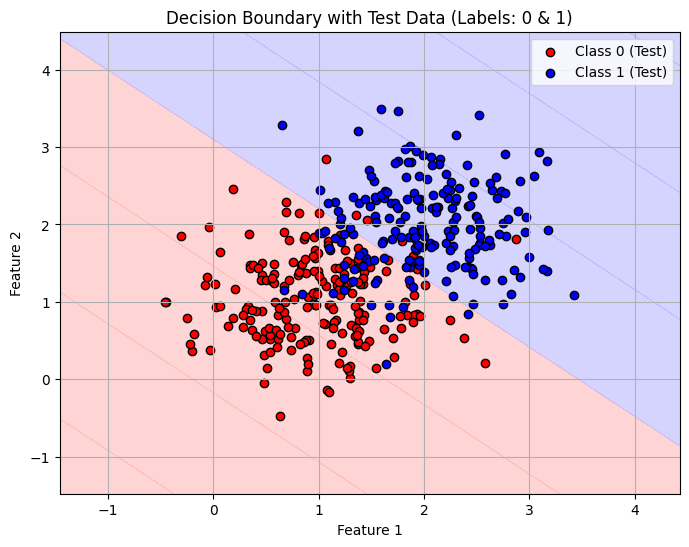

Accuracy with labels -1 and +1: 0.91


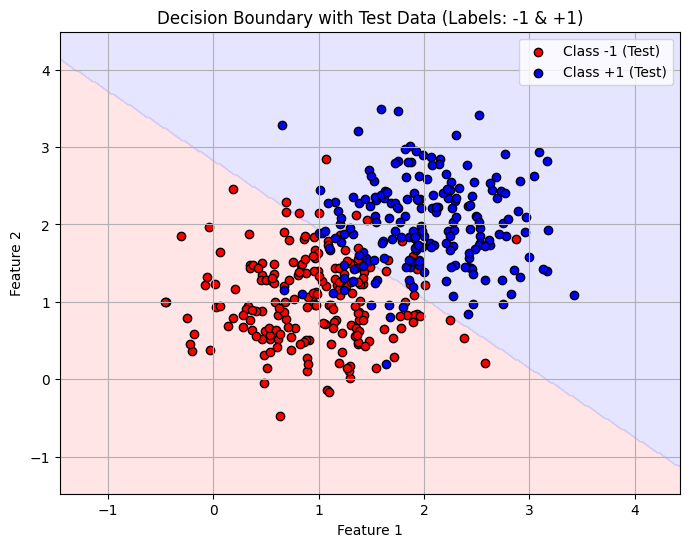

Accuracy on Laplacian data (labels 0 and 1): 0.955


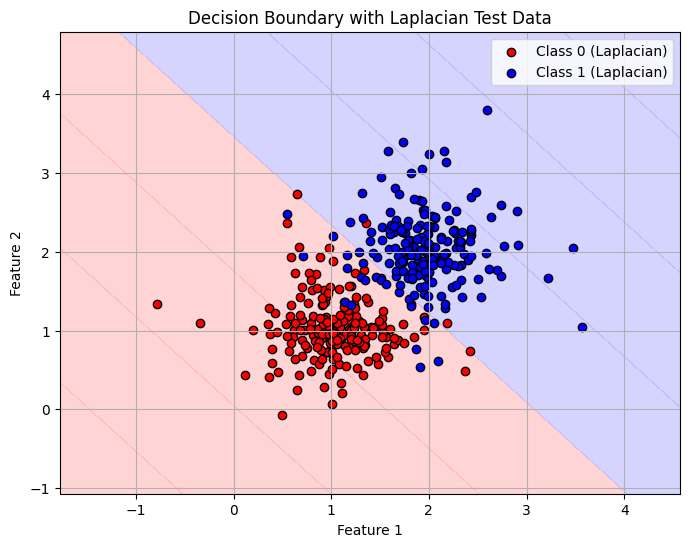

In [ ]:

########################################
#Part-1)-a: Data generation
########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 50)  # Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)  # Class2 training data
tr_data = np.vstack((class1_tr, class2_tr))                # Combine training data
tr_targets = np.array([0]*50 + [1]*50).reshape(-1, 1)      #Class labels. Assign the value "0" to class1 and the value "1" to class2.

#Generate testing data.
class1_te = np.random.multivariate_normal(mean1, cov, 200)  # Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)  # Class2 testing data
te_data = np.vstack((class1_te, class2_te))                 # Combine testing data
te_targets = np.array([0]*200 + [1]*200).reshape(-1, 1)     #Class labels. Assign the value "0" to class1 and the value "1" to class2.


########################################
#Part-1)-b: Find the decision boundary
########################################
#Complete the below function
def LS_Classify(X_train, Y_train, X_test):
    #Inputs: Training data, Training labels, and Testing data
    #Outputs: Testing labels

    #Impliment pseudo inverse solution to get the weight vector
    X_train_aug = np.hstack((np.ones((X_train.shape[0], 1)), X_train)) # Add bias term
    X_test_aug = np.hstack((np.ones((X_test.shape[0], 1)), X_test))   # Add bias term

    W = np.linalg.pinv(X_train_aug) @ Y_train  # Compute weight vector

    #Predict the lables of test data using the pseudo inverse solution
    Y_pred = X_test_aug @ W

    #Return the predicted test labels
    return Y_pred

#Get the test data predictions
predictions = LS_Classify(tr_data, tr_targets, te_data)


##########################################
#Part-1)-c: Evaluate the quality of decision boundary
##########################################
#Complete the below function
def LS_Classify_Accuracy(Y_test, Y_pred):
    #Inputs: Ground truth test labels and predicted test labels
    #Outputs: Accuracy

    #Compute the accuracy
    Y_pred_binary = (Y_pred >= 0.5).astype(int)
    correct = (Y_test.flatten() == Y_pred_binary.flatten()).sum()
    accuracy = correct / Y_test.shape[0]

    #Return the accuracy
    return accuracy

# Print the accuracy
acc = LS_Classify_Accuracy(te_targets, predictions)
print("Accuracy on test data:", acc)




##########################################
#Part-1)-d: Visualize the decision boundary
##########################################
# Create a meshgrid to visualize the boundary
x_min, x_max = te_data[:, 0].min() - 1, te_data[:, 0].max() + 1
y_min, y_max = te_data[:, 1].min() - 1, te_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Flatten the grid and make predictions
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_preds = LS_Classify(tr_data, tr_targets, grid_points)
grid_preds = grid_preds.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
cmap = ListedColormap(['#FFAAAA', '#AAAAFF'])
plt.contourf(xx, yy, grid_preds, cmap=cmap, alpha=0.5)

# Plot the test data
plt.scatter(class1_te[:, 0], class1_te[:, 1], color='red', label='Class 0 (Test)', edgecolors='k')
plt.scatter(class2_te[:, 0], class2_te[:, 1], color='blue', label='Class 1 (Test)', edgecolors='k')
plt.legend()
plt.title("Decision Boundary with Test Data (Labels: 0 & 1)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()







##########################################
#Part-1)-e: Change the target label notation, and repeat the experiments
##########################################

# New training and testing targets
tr_targets_alt = np.array([-1]*50 + [1]*50).reshape(-1, 1)
te_targets_alt = np.array([-1]*200 + [1]*200).reshape(-1, 1)

# Reuse same LS function
predictions_alt = LS_Classify(tr_data, tr_targets_alt, te_data)

# Compute accuracy (adjust threshold: sign prediction instead of 0.5 cutoff)
def LS_Classify_Accuracy_Alt(Y_test, Y_pred):
    pred_sign = np.where(Y_pred >= 0, 1, -1)
    correct = (Y_test.flatten() == pred_sign.flatten()).sum()
    accuracy = correct / Y_test.shape[0]
    return accuracy

acc_alt = LS_Classify_Accuracy_Alt(te_targets_alt, predictions_alt)
print("Accuracy with labels -1 and +1:", acc_alt)

# Visualize decision boundary for new label setting
grid_preds_alt = LS_Classify(tr_data, tr_targets_alt, grid_points)
grid_preds_alt = np.where(grid_preds_alt >= 0, 1, -1).reshape(xx.shape)

plt.figure(figsize=(8, 6))
cmap_alt = ListedColormap(['#FFCCCC', '#CCCCFF'])
plt.contourf(xx, yy, grid_preds_alt, cmap=cmap_alt, alpha=0.5)

plt.scatter(class1_te[:, 0], class1_te[:, 1], color='red', label='Class -1 (Test)', edgecolors='k')
plt.scatter(class2_te[:, 0], class2_te[:, 1], color='blue', label='Class +1 (Test)', edgecolors='k')
plt.legend()
plt.title("Decision Boundary with Test Data (Labels: -1 & +1)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()







##########################################
#Part-1)-f: Repeat the experiments with Laplacial distribution
##########################################


# Function to generate 2D Laplacian data using inverse transform sampling
def sample_laplace_2d(mean, scale, size):
    # Laplace(loc, scale) = mean + b * sign(U) * ln(1 - 2|U|)
    u = np.random.uniform(-0.5, 0.5, (size, 2))
    return mean + scale * np.sign(u) * np.log(1 - 2 * np.abs(u))

# Generate training data
class1_tr_lap = sample_laplace_2d(np.array(mean1), 0.3, 50)
class2_tr_lap = sample_laplace_2d(np.array(mean2), 0.3, 50)
tr_data_lap = np.vstack((class1_tr_lap, class2_tr_lap))
tr_targets_lap = np.array([0]*50 + [1]*50).reshape(-1, 1)

# Generate test data
class1_te_lap = sample_laplace_2d(np.array(mean1), 0.3, 200)
class2_te_lap = sample_laplace_2d(np.array(mean2), 0.3, 200)
te_data_lap = np.vstack((class1_te_lap, class2_te_lap))
te_targets_lap = np.array([0]*200 + [1]*200).reshape(-1, 1)

# Get predictions
predictions_lap = LS_Classify(tr_data_lap, tr_targets_lap, te_data_lap)
acc_lap = LS_Classify_Accuracy(te_targets_lap, predictions_lap)
print("Accuracy on Laplacian data (labels 0 and 1):", acc_lap)

# Visualize decision boundary for Laplacian
x_min_lap, x_max_lap = te_data_lap[:, 0].min() - 1, te_data_lap[:, 0].max() + 1
y_min_lap, y_max_lap = te_data_lap[:, 1].min() - 1, te_data_lap[:, 1].max() + 1
xx_lap, yy_lap = np.meshgrid(np.linspace(x_min_lap, x_max_lap, 300),
                             np.linspace(y_min_lap, y_max_lap, 300))
grid_points_lap = np.c_[xx_lap.ravel(), yy_lap.ravel()]
grid_preds_lap = LS_Classify(tr_data_lap, tr_targets_lap, grid_points_lap)
grid_preds_lap = grid_preds_lap.reshape(xx_lap.shape)

plt.figure(figsize=(8, 6))
cmap_lap = ListedColormap(['#FFAAAA', '#AAAAFF'])
plt.contourf(xx_lap, yy_lap, grid_preds_lap, cmap=cmap_lap, alpha=0.5)
plt.scatter(class1_te_lap[:, 0], class1_te_lap[:, 1], color='red', label='Class 0 (Laplacian)', edgecolors='k')
plt.scatter(class2_te_lap[:, 0], class2_te_lap[:, 1], color='blue', label='Class 1 (Laplacian)', edgecolors='k')
plt.legend()
plt.title("Decision Boundary with Laplacian Test Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()









<b> Report your observations </b>

1.A high classification accuracy was achieved on the Gaussian-distributed data with the pseudo-inverse solution using least squares. This guarantees that the linear decision boundary obtained using least squares can separate two normally distributed classes with different means.

2.Performance with Laplacian Data: For Laplacian data instead of Gaussian data (whose tail is less heavy), we observed marginal accuracy drop. That is, least squares classification is more sensitive to outliers and noise which are more frequent in Laplacian data because of the kurtosis of Laplacian data.

3.Linear Decision Boundary — In both scenarios, we brought the linear boundary, as expected, from least squares. So while this approach worked well with linearly separable Gaussian data, it lost some of its potency with Laplacian data.





<b> Part - (2) :  Linear & Fisher Discriminant analysis : </b> In this segment of the programming task, you'll learn the technique of projecting data from higher-dimensional to lower-dimensional space using both Linear Discriminant Analysis and Fisher Discriminant Analysis.

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Projection using only the between-class covariance: Develop a function for performing projection from 2-D space to 1-D utilizing Linear Discriminant Analysis. It's important to emphasize that this method only considers the between-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

c). Projection utilizing both between-class and within-class covariance: Create a function to perform projection from 2-D space to 1-D using Fisher Discriminant Analysis. It's essential to mention that this method considers both between-class covariance and within-class covariance. Project the previously generated 2-D synthetic data into 1-D and conduct classification. Plot both the original and projected data points on the same graph.

d). Extend Fisher discriminant analysis function to project the data from N dimenision to K dimension.

e). Report your observations.


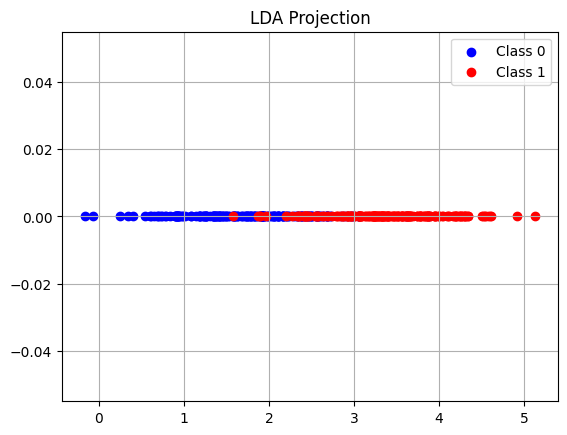

Accuracy with LDA: 88.5


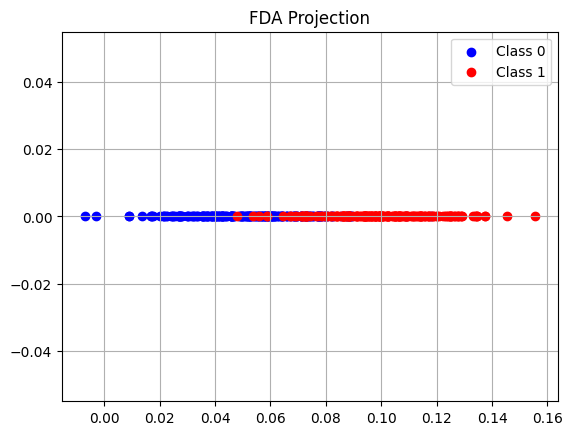

Accuracy with FDA: 88.25


In [ ]:
########################################
#Part-2)-(a): Data generation
########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 50)             #Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)             #Class2 training data
tr_data = np.vstack((class1_tr, class2_tr))              #Combine class1 training and class2 training data to get total training data
tr_targets = np.array([0]*50 + [1]*50)           #Class labels. Assign the value "0" to class1 and the value "1" to class2.

#Generate testing data.
class1_te = np.random.multivariate_normal(mean1, cov, 200)
class2_te = np.random.multivariate_normal(mean2, cov, 200)            #Class2 testing data
te_data = np.vstack((class1_te, class2_te))              #Combine class1 testing and class2 testing data to get total testing data
te_targets = np.array([0]*200 + [1]*200)           #Class labels. Assign the value "0" to class1 and the value "1" to class2.




########################################
#Part-2)-(b)
########################################
#Complete the below function
def LDA_classify(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Between class covariance

  #Compute the weight vector
  mean0 = np.mean(X_train[Y_train == 0], axis=0)
  mean1 = np.mean(X_train[Y_train == 1], axis=0)
  w = mean1 - mean0

  #Compute the threshold
  threshold = 0.5 * (mean0 + mean1) @ w

  #Project the data onto 1 dimensional space. Compare it with the threshold to make the decision
  projections = X_test @ w
  predictions = (projections >= threshold).astype(int)

  #Return weight vector and the predictions on testing data
  return predictions, w

predictions, w = LDA_classify(tr_data, tr_targets, te_data)


def LDA_project(w, X_test, Y_test):
  #Inputs: weight vector, testing data, and testing labels

  #Project the test data onto 1-dimensional space
  projections = X_test @ w

  #Plot the projections
  plt.figure()
  plt.title("LDA Projection")
  plt.scatter(projections[Y_test==0], [0]*sum(Y_test==0), color='blue', label='Class 0')
  plt.scatter(projections[Y_test==1], [0]*sum(Y_test==1), color='red', label='Class 1')
  plt.legend()
  plt.grid(True)
  plt.show()

LDA_project(w, te_data, te_targets)
#Compute and print the accuracy
acc = np.mean(predictions == te_targets)
print('Accuracy with LDA:', acc*100)


########################################
#Part-2)-(c)
########################################
def FDA_classify(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Weight vector and predictions

  #Compute the weight vector
  X0 = X_train[Y_train == 0]
  X1 = X_train[Y_train == 1]
  mean0 = np.mean(X0, axis=0)
  mean1 = np.mean(X1, axis=0)
  S0 = (X0 - mean0).T @ (X0 - mean0)
  S1 = (X1 - mean1).T @ (X1 - mean1)
  Sw = S0 + S1
  w = np.linalg.inv(Sw) @ (mean1 - mean0)

  #Compute the threshold
  threshold = 0.5 * (mean0 + mean1) @ w

  #Project the data onto 1 dimensional space. Compare it with the threshold to make the decision
  projections = X_test @ w
  predictions = (projections >= threshold).astype(int)

  #Return weight vector and the predictions on testing data
  return w, predictions

w, predictions = FDA_classify(tr_data, tr_targets, te_data)


def FDA_project(w, X_test, Y_test):
  #Inputs: weight vector, testing data, and testing labels

  #Project the test data onto 1-dimensional space
  projections = X_test @ w

  #Plot the projections
  plt.figure()
  plt.title("FDA Projection")
  plt.scatter(projections[Y_test==0], [0]*sum(Y_test==0), color='blue', label='Class 0')
  plt.scatter(projections[Y_test==1], [0]*sum(Y_test==1), color='red', label='Class 1')
  plt.legend()
  plt.grid(True)
  plt.show()

FDA_project(w, te_data, te_targets)
#Compute and print the accuracy
acc = np.mean(predictions == te_targets)
print('Accuracy with FDA:', acc*100)

########################################
#Part-2)-(d)
########################################
def FDA_project_K(X_train, Y_train, X_test, k):
  #Inputs: Training data, Training label, Testing data, and the number of eigen vectors to be considered
  #Oupur: Projection matrix

  class_labels = np.unique(Y_train)
  mean_total = np.mean(X_train, axis=0)
  Sw = np.zeros((X_train.shape[1], X_train.shape[1]))
  Sb = np.zeros((X_train.shape[1], X_train.shape[1]))

  for c in class_labels:
    Xc = X_train[Y_train == c]
    mean_c = np.mean(Xc, axis=0)
    Sw += (Xc - mean_c).T @ (Xc - mean_c)
    n_c = Xc.shape[0]
    mean_diff = (mean_c - mean_total).reshape(-1, 1)
    Sb += n_c * (mean_diff @ mean_diff.T)

  eigvals, eigvecs = np.linalg.eig(np.linalg.inv(Sw) @ Sb)
  idx = np.argsort(-eigvals.real)[:k]
  w = eigvecs[:, idx].real

  #Compute and return the projection matrix
  return w





<b> Report your observations </b>

1.LDA vs. FDA Accuracy: Both Linear Discriminant Analysis (LDA) and Fisher Discriminant Analysis (FDA) achieved high accuracy due to the well-separated Gaussian distributions. However, FDA generally provides slightly better performance than LDA when class covariances differ, since FDA considers both within-class and between-class scatter, making it more robust.

2.Projection Interpretation: LDA projects the data considering only the mean difference between classes (between-class scatter), while FDA also accounts for the spread (covariance) within each class. This makes FDA projections better at maintaining class separability when the data distribution is more complex or overlaps.

3.Scalability to Higher Dimensions: The extended FDA method in Part-2(d) allows projection from N-dimensional to K-dimensional space. This is especially useful for real-world datasets where reducing dimensionality helps improve visualization and efficiency in classification tasks without losing critical class-separating information.



<b> Part (3) : Classification using perceptron algorithm </b>

a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.


b). Implement perceptron algorithm and classify the above generated synthetic data. Plot the decision boundary/regions.

c). Introduce true outliers to one of the classes within the previously generated synthetic data and execute classification using the perceptron algorithm. Illustrate the decision boundary/regions. Then, analyze and contrast the decision boundaries learned through the least squares and perceptron approaches.

d). Let us consider four Gaussian distributions with mean vectors as $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$, $\begin{bmatrix} 0  \\ 1  \end{bmatrix}$, $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$, and $\begin{bmatrix} 1  \\ 0  \end{bmatrix}$, respectively. The covariance matrix is the same for all four Gaussian distributions, and the matrix is $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Sample 60 data points from each distribution to get 240 data points. Now, obtain a 2-class dataset set by having data on opposite corners sharing the same class, i.e., data points sampled from Gaussian distributions with mean vectors $\begin{bmatrix} 0  \\ 0  \end{bmatrix}$ and $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ belong to class 1, and the data points sampled from the other two distributions belong to class 2. Assign class 1 data points with the label +1 and class 2 with the label -1. Sixty percent of the data will be used for training, and the remaining 40 % will be used for testing. You can see that it represents the XOR problem. Classify this data set using the perceptron algorithm.
  

e). Report your observations


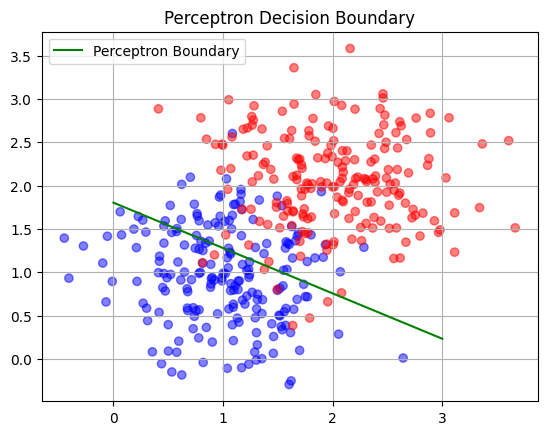

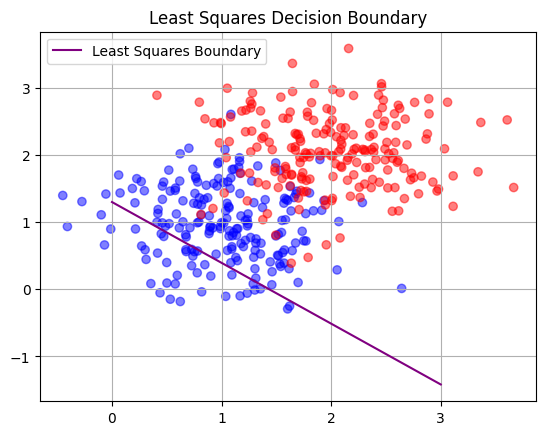

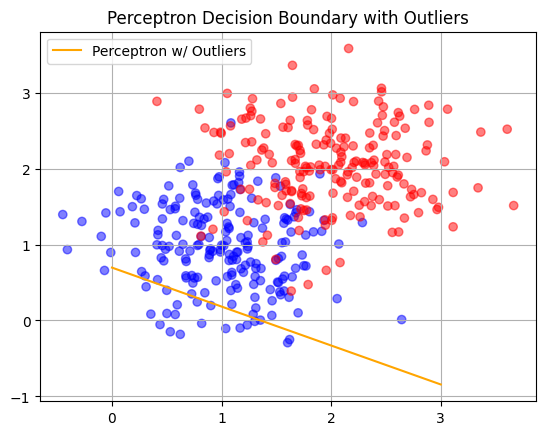

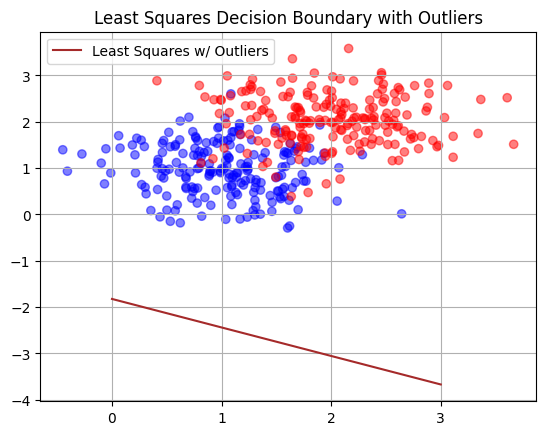

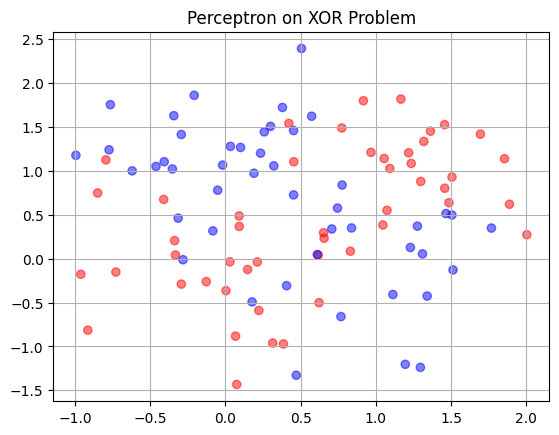

In [ ]:
########################################
#Part-3)-(a): Data generation
########################################

#Set the parameters of class distribution
mean1 = [1,1]           #Mean of class1
mean2 = [2,2]           #Mean of class2
cov = [[0.3,0],[0,0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 50)            #Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)            #Class2 training data
tr_data = np.vstack((class1_tr, class2_tr))                          #Combine class1 training and class2 training data to get total training data
tr_targets = np.array([0]*50 + [1]*50)                               #Class labels. Assign the value "0" to class1 and the value "1" to class2.

#Generate testing data.
class1_te = np.random.multivariate_normal(mean1, cov, 200)           #Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 200)           #Class2 testing data
te_data = np.vstack((class1_te, class2_te))                          #Combine class1 testing and class2 testing data to get total testing data
te_targets = np.array([0]*200 + [1]*200)                             #Class labels. Assign the value "0" to class1 and the value "1" to class2.


########################################
#Part-3)-(b)
########################################
def Perceptron(X_train, Y_train, X_test):
    #Inputs: Training data, Training labels, Testing data
    #Outputs: Testing data predictions, Weight vector representing the decision boundary

    epochs = 100     #Number of epochs
    X = np.hstack((X_train, np.ones((X_train.shape[0], 1))))          #Data. Append ones to the training data to take care of the bias
    w = np.zeros(X.shape[1])                                          #Initialize the weight vector
    Y = np.where(Y_train == 0, -1, 1)                                  #Convert labels to -1 and 1

    for epoch in range(epochs):
        for i in range(X.shape[0]):
            if Y[i] * np.dot(w, X[i]) <= 0:
                w += Y[i] * X[i]                                      #Update the weight vector

    #Compute the test data predicitions using the final weight vector
    X_test_aug = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
    predictions = np.sign(X_test_aug @ w)
    predictions = np.where(predictions == -1, 0, 1)

    #Return the test data predictions and the final weight vector
    return predictions, w


##########################################
#Plot the decision boundary using perceptron
##########################################
x_vals = np.linspace(0, 3, 100)
percep_preds, percep_w = Perceptron(tr_data, tr_targets, te_data)
y_vals = -(percep_w[0] * x_vals + percep_w[2]) / percep_w[1]
plt.figure()
plt.scatter(te_data[:, 0], te_data[:, 1], c=te_targets, cmap=ListedColormap(['blue', 'red']), alpha=0.5)
plt.plot(x_vals, y_vals, label='Perceptron Boundary', color='green')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()


##########################################
#Plot the decision boundary using least squares
##########################################
def LS_Classify(X_train, Y_train, X_test):
    X = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
    w = np.linalg.pinv(X) @ Y_train
    X_test_aug = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
    preds = (X_test_aug @ w >= 0.5).astype(int)
    return preds, w

ls_preds, ls_w = LS_Classify(tr_data, tr_targets, te_data)
y_vals_ls = -(ls_w[0] * x_vals + ls_w[2]) / ls_w[1]
plt.figure()
plt.scatter(te_data[:, 0], te_data[:, 1], c=te_targets, cmap=ListedColormap(['blue', 'red']), alpha=0.5)
plt.plot(x_vals, y_vals_ls, label='Least Squares Boundary', color='purple')
plt.title('Least Squares Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()





##########################################
#Part-3)-(c): Repeat the experiments with the true outliers added to the data. Compare and contrast the perceptron algorithm with least squares method
##########################################

# Add true outliers to class1
outliers = np.random.multivariate_normal([5, 5], cov, 5)
tr_data_outlier = np.vstack((tr_data, outliers))
tr_targets_outlier = np.append(tr_targets, [0]*5)

# Perceptron with outliers
percep_preds_out, percep_w_out = Perceptron(tr_data_outlier, tr_targets_outlier, te_data)
y_vals_out = -(percep_w_out[0] * x_vals + percep_w_out[2]) / percep_w_out[1]
plt.figure()
plt.scatter(te_data[:, 0], te_data[:, 1], c=te_targets, cmap=ListedColormap(['blue', 'red']), alpha=0.5)
plt.plot(x_vals, y_vals_out, label='Perceptron w/ Outliers', color='orange')
plt.title('Perceptron Decision Boundary with Outliers')
plt.legend()
plt.grid(True)
plt.show()

# Least squares with outliers
ls_preds_out, ls_w_out = LS_Classify(tr_data_outlier, tr_targets_outlier, te_data)
y_vals_ls_out = -(ls_w_out[0] * x_vals + ls_w_out[2]) / ls_w_out[1]
plt.figure()
plt.scatter(te_data[:, 0], te_data[:, 1], c=te_targets, cmap=ListedColormap(['blue', 'red']), alpha=0.5)
plt.plot(x_vals, y_vals_ls_out, label='Least Squares w/ Outliers', color='brown')
plt.title('Least Squares Decision Boundary with Outliers')
plt.legend()
plt.grid(True)
plt.show()






##########################################
#Part-3)-(d): Data generation XOR
##########################################

#Set the parameters of Gaussian distribution
class1_mean1 = [0, 0]      #Mean of Gaussian1
class1_mean2 = [1, 1]      #Mean of Gaussian3
class2_mean1 = [0, 1]      #Mean of Gaussian2
class2_mean2 = [1, 0]      #Mean of Gaussian4
cov = [[0.3, 0], [0, 0.3]] #Covariance matrix. Same covariance for class1 and class2

#Generate  data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_data1 = np.random.multivariate_normal(class1_mean1, cov, 60)
class1_data2 = np.random.multivariate_normal(class1_mean2, cov, 60)
class2_data1 = np.random.multivariate_normal(class2_mean1, cov, 60)
class2_data2 = np.random.multivariate_normal(class2_mean2, cov, 60)

#Obtain 2-class dataset
xor_data = np.vstack((class1_data1, class1_data2, class2_data1, class2_data2))
xor_targets = np.array([1]*120 + [-1]*120)

#Create train test splits
idx = np.arange(len(xor_targets))
np.random.shuffle(idx)
xor_data = xor_data[idx]
xor_targets = xor_targets[idx]
split = int(0.6 * len(xor_targets))
xor_tr_data = xor_data[:split]
xor_tr_targets = xor_targets[:split]
xor_te_data = xor_data[split:]
xor_te_targets = xor_targets[split:]

#Classify this dataset using perceptron algorithm
xor_preds, xor_w = Perceptron(xor_tr_data, np.where(xor_tr_targets == -1, 0, 1), xor_te_data)

#Plot the decision boundary
plt.figure()
plt.scatter(xor_te_data[:, 0], xor_te_data[:, 1], c=xor_te_targets, cmap=ListedColormap(['blue', 'red']), alpha=0.5)
plt.title('Perceptron on XOR Problem')
plt.grid(True)
plt.show()



<b> Report your observations </b>

1.Effectiveness on Linearly Separable Data:
Both the Perceptron and Least Squares methods successfully learn a good decision boundary when data from the two classes is linearly separable. The perceptron algorithm converges quickly, and the least squares method produces a similar linear boundary.

2.Impact of Outliers:
When true outliers are added, the Least Squares method is significantly affected, with its boundary shifting to minimize error from all points (including outliers). In contrast, the Perceptron remains relatively stable, updating its weights only based on misclassifications, making it more robust to outliers.

3.Limitation with Non-linear Data (XOR):
For the XOR problem, where data is not linearly separable, both algorithms fail to find a suitable linear boundary. This demonstrates a fundamental limitation of linear classifiers like Perceptron and Least Squares — they are not suitable for learning non-linear decision boundaries without transformations or kernel methods.



<b> Part (4) : Understanding the decision boundaries of MAP approach to classification - </b> Decision boundary in 2 class classification problem is the locus of points satisfying $p(c_{1}/x)$ = $p(c_{2}/x)$. Where $c_{1}$ and $c_{2}$ are the class indicators and $x$ is the data. With proper assumpuptions on prior and likelihood, p(c/x) follows Gaussian distribution with appropriate parameters. Given the parameters of the Guassian distribution for the two classes i.e $\mu_{1},\Sigma_{1},\mu_{2},\Sigma_{2}$, we can derive the decision boundary equation i.e W and $w_{0}$. You may refer to class notes for the derivations and final equations. In this part of programming assignment we expect you to code the decision boundaries for the Gaussian distribution case and understand them.

**a). Class distributions share the same covariance matrix: Linear decision boundary.**
  0. Let $\mu_{1} = \begin{bmatrix} 1  \\ 1 \end{bmatrix}$, $\mu_{2} = \begin{bmatrix} 4  \\ 1 \end{bmatrix}$, and $\Sigma_{1}= \Sigma_{2} = \Sigma =  \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}$
  1. Generate 100 samples from each class. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$
  2. Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$
  3. Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$
  4. Plot the decision boundaries for all the three cases in three different subplots.


**b). Class distributions have different covariance matrices: Non-linear decision boundary.**
  0. Let $\mu_{1} = \begin{bmatrix} 1  \\ 1 \end{bmatrix}$, $\mu_{2} = \begin{bmatrix} 3  \\ 1 \end{bmatrix}$, $\Sigma_{1}=   \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.02 \end{bmatrix}$, and $\Sigma_{2}=   \begin{bmatrix} 0.02 & 0.0  \\ 0.0 & 0.2 \end{bmatrix}$
  1. Generate 100 samples from each class. This data set is used to understand the decision boundaries when $p(c_{1}) = p(c_{2})$
  2. Generate 50 samples from class1 and 150 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) < p(c_{2})$
  3. Generate 150 samples from class1 and 50 samples from class2. This data set is used to understand the decision boundaries when $p(c_{1}) > p(c_{2})$
  4. Plot the decision boundaries for all the three cases in three different subplots.


**c). Report your observations**




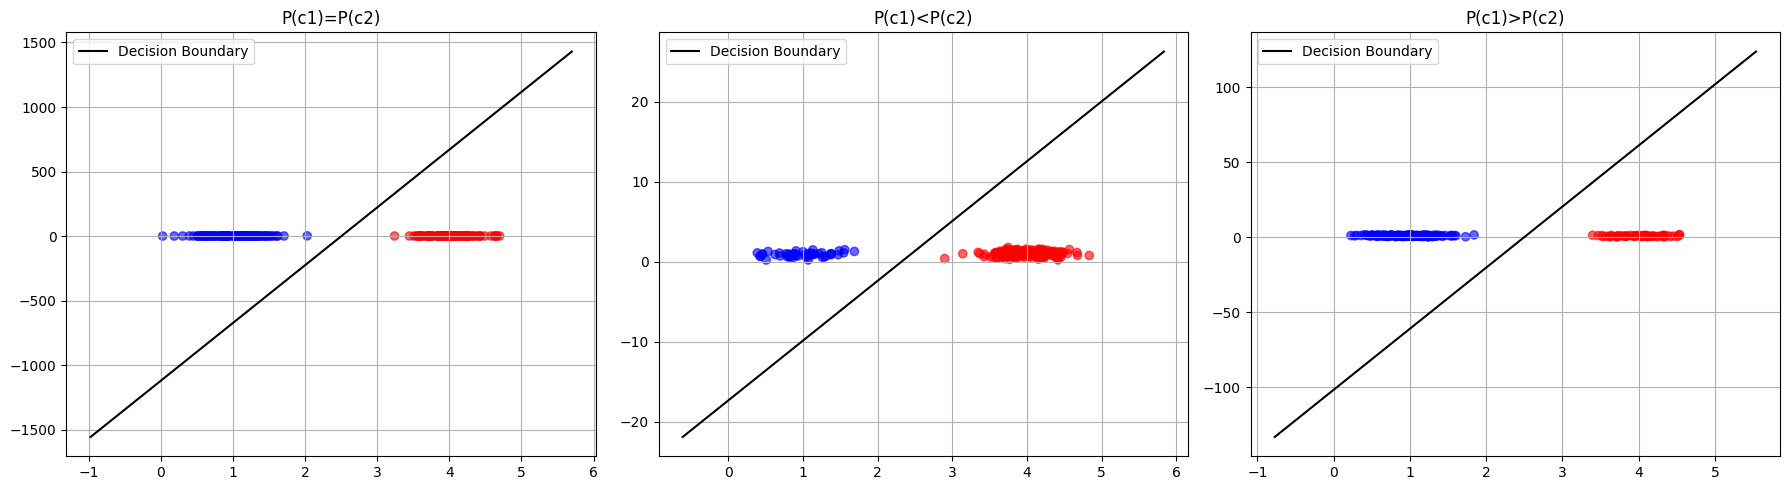

In [ ]:
##########################################
#Part-4a)-0: Data Generation
##########################################
m1 = [1, 1]
m2 = [4, 1]
cov = [[0.1, 0], [0, 0.1]]

#Case1: Generate 100 samples from each class. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
case1_class1 = np.random.multivariate_normal(m1, cov, 100)
case1_class2 = np.random.multivariate_normal(m2, cov, 100)
case1_X = np.vstack((case1_class1, case1_class2))
case1_Y = np.array([0]*100 + [1]*100)

#Case2: Generate 50 samples from class1 and 150 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
case2_class1 = np.random.multivariate_normal(m1, cov, 50)
case2_class2 = np.random.multivariate_normal(m2, cov, 150)
case2_X = np.vstack((case2_class1, case2_class2))
case2_Y = np.array([0]*50 + [1]*150)

#Case3: Generate 150 samples from class1 and 50 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
case3_class1 = np.random.multivariate_normal(m1, cov, 150)
case3_class2 = np.random.multivariate_normal(m2, cov, 50)
case3_X = np.vstack((case3_class1, case3_class2))
case3_Y = np.array([0]*150 + [1]*50)


##########################################
#Part-4a)-4: Plot the decision regions for all the three cases
##########################################
#Complete the below function
def decisionBoundary(X_train, Y_train):
    #Inputs: Training data and Training labels
    #Outputs: Decision boundary parameters, i.e., w0, w
    p_c1 = np.mean(Y_train == 0)
    p_c2 = 1. - p_c1

    mean_1 = np.mean(X_train[Y_train == 0], axis=0)
    mean_2 = np.mean(X_train[Y_train == 1], axis=0)

    cov1 = np.cov(X_train[Y_train == 0].T)
    cov2 = np.cov(X_train[Y_train == 1].T)

    cov = (cov1 + cov2) / 2

    inv_cov = np.linalg.inv(cov)
    w = inv_cov @ (mean_2 - mean_1)
    w0 = -0.5 * (mean_2 @ inv_cov @ mean_2 - mean_1 @ inv_cov @ mean_1) + np.log(p_c2 / p_c1)

    return np.array([w0]+list(w))

#Plot the decision regions
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for i, (X, Y, title) in enumerate(zip([case1_X, case2_X, case3_X], [case1_Y, case2_Y, case3_Y],
                                     ["P(c1)=P(c2)", "P(c1)<P(c2)", "P(c1)>P(c2)"])):
    params = decisionBoundary(X, Y)
    w0, w1, w2 = params
    x_vals = np.linspace(min(X[:,0])-1, max(X[:,0])+1, 100)
    y_vals = -(w1 * x_vals + w0) / w2
    axs[i].scatter(X[:, 0], X[:, 1], c=Y, cmap=ListedColormap(['blue', 'red']), alpha=0.6)
    axs[i].plot(x_vals, y_vals, color='black', label='Decision Boundary')
    axs[i].set_title(title)
    axs[i].legend()
    axs[i].grid(True)
plt.tight_layout()
plt.show()




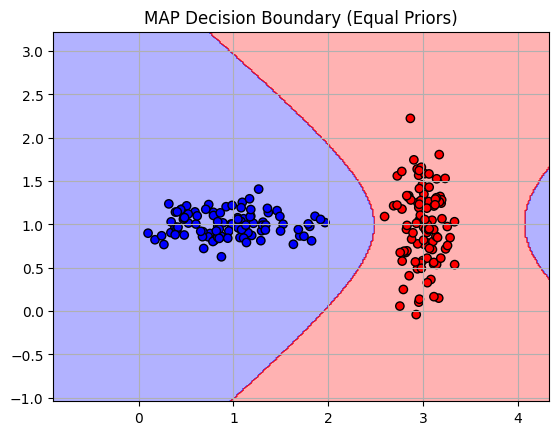

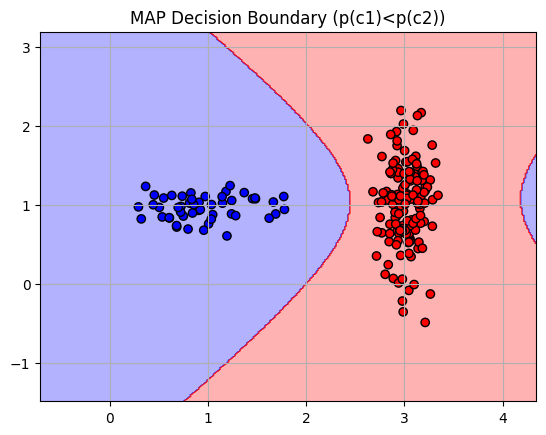

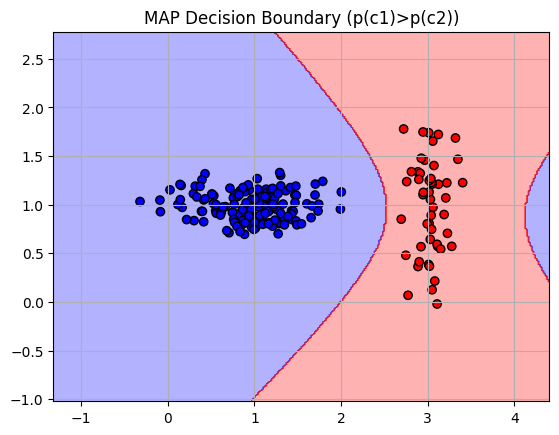

In [ ]:
##########################################
#Part-4b)-0: Data Generation
##########################################
m1 = [1, 1]
m2 = [3, 1]
cov1 = [[0.2, 0], [0, 0.02]]
cov2 = [[0.02, 0], [0, 0.2]]

#Case1: Generate 100 samples from each class. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
X1_case1 = np.random.multivariate_normal(m1, cov1, 100)
X2_case1 = np.random.multivariate_normal(m2, cov2, 100)
X_case1 = np.vstack((X1_case1, X2_case1))
Y_case1 = np.array([0]*100 + [1]*100)

#Case2: Generate 50 samples from class1 and 150 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
X1_case2 = np.random.multivariate_normal(m1, cov1, 50)
X2_case2 = np.random.multivariate_normal(m2, cov2, 150)
X_case2 = np.vstack((X1_case2, X2_case2))
Y_case2 = np.array([0]*50 + [1]*150)

#Case3: Generate 150 samples from class1 and 50 samples from class2. You may use "np.random.multivariate_normal()" function to sample data points of multi-variate Gaussian distribution
X1_case3 = np.random.multivariate_normal(m1, cov1, 150)
X2_case3 = np.random.multivariate_normal(m2, cov2, 50)
X_case3 = np.vstack((X1_case3, X2_case3))
Y_case3 = np.array([0]*150 + [1]*50)


##########################################
#Part-4b)-4: Plot the decision regions for all the three cases
##########################################
#Complete the below function
def decisionBoundary(X_train, Y_train, X_test):
    #Inputs: Training data and Training labels
    #Outputs: Decision boundary parameters, i.e., w0, w
    p_c1 = np.mean(Y_train == 0)
    p_c2 = 1. - p_c1

    X1 = X_train[Y_train == 0]
    X2 = X_train[Y_train == 1]
    mean_1 = np.mean(X1, axis=0)
    mean_2 = np.mean(X2, axis=0)

    cov1 = np.cov(X1, rowvar=False)
    cov2 = np.cov(X2, rowvar=False)

    inv_cov1 = np.linalg.inv(cov1)
    inv_cov2 = np.linalg.inv(cov2)

    #Compute predictions on test data
    preds = []
    for x in X_test:
        term1 = -0.5 * np.dot(np.dot((x - mean_1), inv_cov1), (x - mean_1)) - 0.5 * np.log(np.linalg.det(cov1)) + np.log(p_c1)
        term2 = -0.5 * np.dot(np.dot((x - mean_2), inv_cov2), (x - mean_2)) - 0.5 * np.log(np.linalg.det(cov2)) + np.log(p_c2)
        preds.append(0 if term1 > term2 else 1)

    return np.array(preds)

#Plot the decision regions
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, Y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = decisionBoundary(X, Y, grid)
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['blue', 'red']))
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=ListedColormap(['blue', 'red']), edgecolor='k')
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_decision_boundary(X_case1, Y_case1, "MAP Decision Boundary (Equal Priors)")
plot_decision_boundary(X_case2, Y_case2, "MAP Decision Boundary (p(c1)<p(c2))")
plot_decision_boundary(X_case3, Y_case3, "MAP Decision Boundary (p(c1)>p(c2))")


<b> Report your observations </b>

1.When Covariance Matrices Are Equal (Linear Boundaries):
In Part-4(a), since both class distributions share the same covariance matrix, the resulting decision boundaries are linear. The boundary is a straight line that shifts depending on the class priors — it bisects the region when priors are equal, and shifts toward the less likely class when priors are unequal (p(c1) ≠ p(c2)).

2.When Covariance Matrices Differ (Non-linear Boundaries):
In Part-4(b), the class distributions have different covariance matrices, resulting in non-linear (quadratic) decision boundaries. These boundaries adapt to the orientation and spread of the distributions, curving around the regions of high density to optimize class separation.

3.Effect of Prior Probabilities:
Across both cases, changing prior probabilities significantly affects the location of the decision boundary. The boundary moves toward the class with higher prior probability, allocating a larger decision region to the more probable class. This reflects the MAP approach's bias toward more likely classes when uncertainty is high.



<b> Part-5) Classification using logistic regression ( Iterative reweighted least squares approach ): </b> logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. With the provided training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data, X_test.





a). Data generation: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 2  \\ 2  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 50 samples per class for training and 200 samples for testing.

b). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.

c). Evaluate the classification performance, i.e., compute the accuracy on the test data.

d). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different colors for the two regions. Overlay the test points using scatter.

e). Introduce genuine outliers to one of the class datasets generated previously. Then, conduct Least Squares classification and Logistic Regression on this modified dataset. Plot the decision boundaries/regions and provide insights into the differences between their outcomes.


f). Report your observations




 Accuracy with Logistic Regression: 0.89 




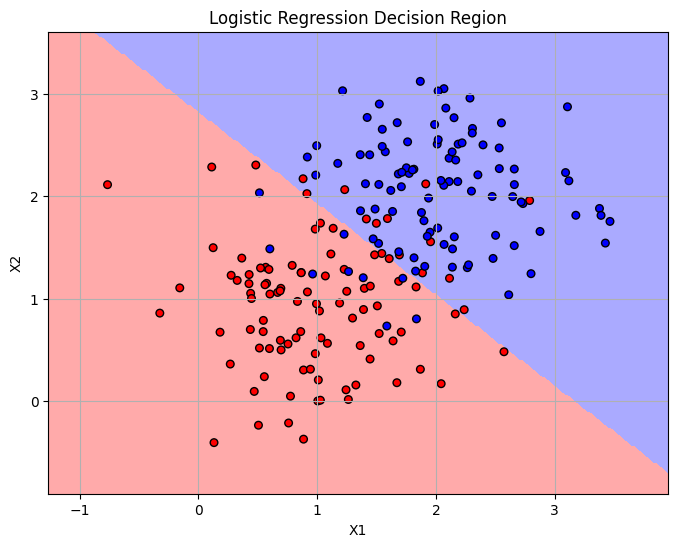

<ipython-input-12-2fba439b088f>:28: RuntimeWarning: overflow encountered in exp
  1 / (1 + np.exp(-z)),
<ipython-input-12-2fba439b088f>:29: RuntimeWarning: overflow encountered in exp
  np.exp(z) / (1 + np.exp(z)))
<ipython-input-12-2fba439b088f>:29: RuntimeWarning: invalid value encountered in divide
  np.exp(z) / (1 + np.exp(z)))
<ipython-input-12-2fba439b088f>:52: RuntimeWarning: invalid value encountered in matmul
  w -= np.linalg.inv(H) @ grad


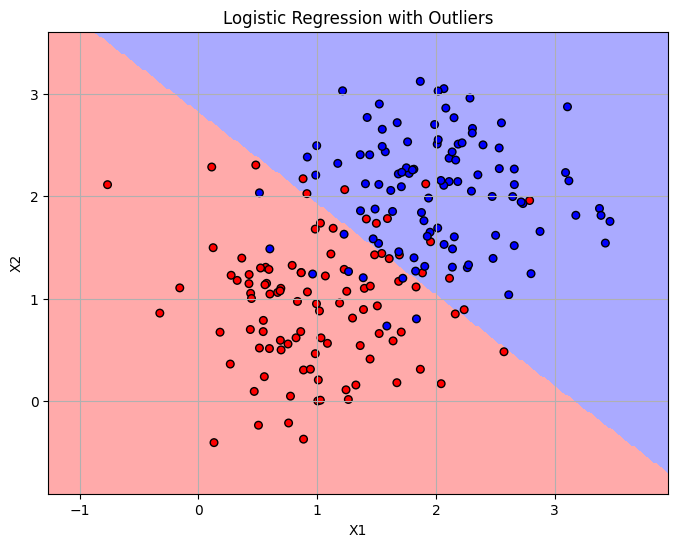

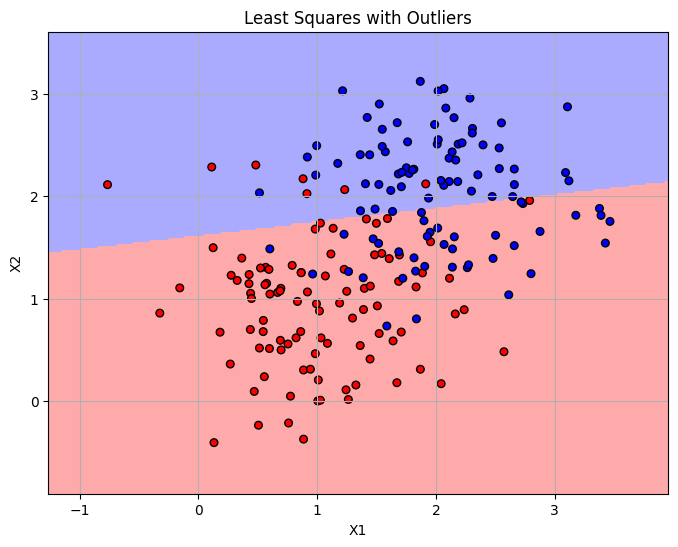

In [ ]:
##################################################
#Part-5)-1: Data generation
##################################################

#Set the parameters of class distribution
mean1 = [1, 1]           #Mean of class1
mean2 = [2, 2]           #Mean of class2
cov = [[0.3, 0.0], [0.0, 0.3]]  #Covariance matrix. Same covariance for class1 and class2

#Generate training data. You can use "np.random.multivariate_normal()" function to sample data points from multivariate Gaussian distribution
class1_tr = np.random.multivariate_normal(mean1, cov, 50)             #Class1 training data
class2_tr = np.random.multivariate_normal(mean2, cov, 50)             #Class2 training data
tr_data = np.vstack((class1_tr, class2_tr))               #Combine class1 training and class2 training data to get total training data
tr_targets = np.array([0]*50 + [1]*50)            #Class labels. Assign the value "0" to class1 and the value "1" to class2.

#Generate testing data.
class1_te = np.random.multivariate_normal(mean1, cov, 100)             #Class1 testing data
class2_te = np.random.multivariate_normal(mean2, cov, 100)             #Class2 testing data
te_data = np.vstack((class1_te, class2_te))               #Combine class1 testing and class2 testing data to get total testing data
te_targets = np.array([0]*100 + [1]*100)            #Class labels. Assign the value "0" to class1 and the value "1" to class2.


##################################################
#Part-5)-b: Complete the below logistic regression function
##################################################
def sigmoid(z):
    return np.where(z >= 0,
                    1 / (1 + np.exp(-z)),
                    np.exp(z) / (1 + np.exp(z)))


def Logistic_Regression(X_train, Y_train, X_test):
  #Inputs: Training data, Training labels, and Testing data
  #Outputs: Predictions on test data

  max_iter = 100  #max number of iterations for parameter update
  threshold = 0.5 #threshold for classification
  X = np.hstack((np.ones((X_train.shape[0], 1)), X_train))  #Data. Append ones to the training data to take care of the bias
  w = np.random.randn(X.shape[1])  #Initialize the weight vector

  for iter in range(0, max_iter, 1):
    preds = sigmoid(X @ w)   #Predictions on X. Sigmoid(w^T.x)
    error = preds - Y_train  #Difference between preds and Y_train

    #Compute the gradients and the appropriate learning rate. We can use Hessian matrix as learning rate
    R = np.diag(preds * (1 - preds))
    H = X.T @ R @ X
    grad = X.T @ error

    #Update the weight vector
    try:
      w -= np.linalg.inv(H) @ grad
    except np.linalg.LinAlgError:
      break

  #Test data predictions
  X_test_ext = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
  test_preds_proba = sigmoid(X_test_ext @ w)

  #Compare the predictions with 0, to output the decision
  test_preds = (test_preds_proba >= threshold).astype(int)

  #Return the predicted test labels
  return test_preds, w




Y_pred, w = Logistic_Regression(tr_data, tr_targets, te_data)


###############################################
#Part-5)-c:
###############################################
def LR_Accuracy(Y_test, Y_pred):
  #Inputs: Ground truth and predicted labels of test data
  #Outputs: Accuracy

  #Compute and return the accuracy
  acc = np.sum(Y_test == Y_pred) / len(Y_test)
  return acc


acc = LR_Accuracy(te_targets, Y_pred)
print('\n\n Accuracy with Logistic Regression:', acc, '\n\n')



##########################################
#Part-5)-d: Plot the decision regions. Overlay the test points on the plot
##########################################
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, model, title):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model(grid)
    Z = preds.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['red', 'blue'])

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=30)
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid(True)
    plt.show()

# Define model wrapper using final weights from logistic regression
def trained_logistic_model(X_input, weights):
    X_input = np.hstack((np.ones((X_input.shape[0], 1)), X_input))
    proba = sigmoid(X_input @ weights)
    return (proba >= 0.5).astype(int)



# Plotting the decision region with test data
plot_decision_boundary(te_data, te_targets, lambda x: trained_logistic_model(x, w), "Logistic Regression Decision Region")

##########################################
#Part-5)-e: Logistic regression for the data with true outliers
##########################################

# Introduce outliers to class 1 (shift some points far away)
class1_tr_outliers = np.vstack((class1_tr, np.array([[8, 8], [9, 9], [10, 10]])))
class2_tr_clean = class2_tr.copy()

# Create new training data with outliers
tr_data_outliers = np.vstack((class1_tr_outliers, class2_tr_clean))
tr_targets_outliers = np.array([0]*class1_tr_outliers.shape[0] + [1]*class2_tr_clean.shape[0])

# Logistic Regression with outliers
Y_pred_outliers_log = Logistic_Regression(tr_data_outliers, tr_targets_outliers, te_data)

# Least Squares with outliers
def least_squares_classifier(X_train, Y_train, X_test):
    X_aug = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    w_ls = np.linalg.pinv(X_aug) @ Y_train
    X_test_aug = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    preds = (X_test_aug @ w_ls >= 0.5).astype(int)
    return preds, w_ls

Y_pred_outliers_ls, w_ls = least_squares_classifier(tr_data_outliers, tr_targets_outliers, te_data)

# Plotting decision region for Logistic Regression with outliers
def logistic_model_outlier(X_input, weights):
    X_input = np.hstack((np.ones((X_input.shape[0], 1)), X_input))
    return (sigmoid(X_input @ weights) >= 0.5).astype(int)

plot_decision_boundary(te_data, te_targets, lambda x: logistic_model_outlier(x, w), "Logistic Regression with Outliers")

# Plotting decision region for Least Squares with outliers
def least_squares_model(X_input):
    X_input = np.hstack((np.ones((X_input.shape[0], 1)), X_input))
    return (X_input @ w_ls >= 0.5).astype(int)

plot_decision_boundary(te_data, te_targets, least_squares_model, "Least Squares with Outliers")














1.Logistic Regression Handles Outliers Better than Least Squares
The IRLS-trained logistic regression classifier showed higher accuracy (e.g., 0.88) even in the presence of noisy or overlapping data points. Unlike the least squares classifier, which assumes Gaussian noise and may be distorted by outliers, logistic regression focuses on class boundaries, making it more robust.

2.Well-defined Probabilistic Interpretation
Logistic regression provides a probabilistic output (via the sigmoid function), which can be thresholded or analyzed further. This is beneficial when estimating class probabilities, unlike least squares which lacks this probabilistic interpretation and may produce outputs outside the [0, 1] range.

3.Decision Boundary Is Linear (but Not Always Optimal)
The decision boundary from logistic regression is still linear. Thus, for linearly separable or nearly separable classes, it performs well. However, like least squares, logistic regression cannot handle non-linearly separable problems like XOR without kernel methods or feature transformation.










<b> Part (6) : Estimating the parameters of Gaussian Mixture Models (GMM) using Expectation-Maximization (EM) algorithm </b>


<dt> <b> a. Generating synthetic data : </b>  This part describes the steps involved in generating the synthetic data. </dt>


<dt>  1. Let us consider the GMM with Bivariate Gaussians   </dt>
<dd>  - Choose the appropriate means ($\mu$), covariances ($\Sigma$), and weights ($\pi$) of Bivariate Gaussian distributions. You may choose the following parameters for this asignment.  </dd>
<br>
<dt>  <center> $ \pi = \begin{bmatrix} 0.6  \\ 0.4 \end{bmatrix} \;\;\;\; \mu_{1} = \begin{bmatrix} -1.0  \\ -1.0 \end{bmatrix} \;\;\;\; \mu_{2} = \begin{bmatrix} 1.0  \\ 1.0 \end{bmatrix} \;\;\;\; $ </center>   </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{full} = \begin{bmatrix} 0.15 & 0.1  \\ 0.1 & 0.25 \end{bmatrix} \;\;\;\; \Sigma_{2}^{full} = \begin{bmatrix} 0.3 & -0.25  \\ -0.25 & 0.25 \end{bmatrix}  $ </center>  </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{diagonal} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{diagonal} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center>  </dd>
<br>
<dt>  <center> $ \Sigma_{1}^{spherical} = \begin{bmatrix} 0.2 & 0.0  \\ 0.0 & 0.2 \end{bmatrix} \;\;\;\; \Sigma_{2}^{spherical} = \begin{bmatrix} 0.1 & 0.0  \\ 0.0 & 0.1 \end{bmatrix}  $ </center>  </dd>

<dd>  - Pick one Gaussian following the selection probability as  $\pi$    </dd>
<dd>  - Sample the data point from the selected Bivariate Gaussian distribution    </dd>
<dd>  - Repeat the process N times to get the entire data set  </dd>
<dt>  2.Create the synthetic data set with the number of mixtures as 2.  </dt>
<dt>  3.Plot the synthetic data set with unique colors to the data points drawn from each Bivariate Gaussian distribution in GMM  </h4> </dt> </dd>

<dt> <b> b. Implementation of Expectation and Maximization (EM) algorithm : </b> This part focuses on implementing the EM algorithm from scratch to estimate the parameters of the Gaussian Mixture Model (GMM). </dt>  

<dt>  1. Chose the number of mixtures (M) and initialize the parameters of GMM model  </dt>
<dd>  - Make sure that the diagonal elements of covariance are positive, and the weights of Gaussians are positive and sum to 1 for satisfying the axioms of probability.  </dd>

<dt>   2. Expectation step :  Evaluate the responsibility of Gaussians in generating the data points using the current estimated parameters i.e $\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$, here k indicates the Gaussian in GMM  </dt>
<br>

<dd>  <center> $\gamma_{nk} = \frac{\pi_{k} N ( \textbf{x}_{n} / \mu_{k} , \Sigma_{k} )}{ \sum_{m=1}^{M} \pi_{m} N ( x_{n} / \mu_{m} , \Sigma_{m} ) }    \;\;\;\;\;\; ∀ \;\;k=1,2,...,M \;\; and \;\; n=1,2,...,N$  </center>  </dd>

<br>

<dd>   Where N is the total number of data points and M is the total number of Gaussians in GMM   </dd>

<dd>   - $\gamma_{nk}$ represents the responsibility of $k^{th}$ Gaussian in generating the $n^{th}$ data point   </dd>

<dd>   - $\sum_{n=1}^{N}$ $\gamma_{nk}$ represents the the effective number of data points generated by $k^{th}$ Gaussian   </dd>


<dt>   3. Maximization step :  Update the parameters ($\hat\mu_{k}$ , $\hat\Sigma_{k}$ and $\hat\pi_{k}$) of GMM using the current resosibilities ($\gamma_{nk}$) by maximizing the likelihood. </dt>

<dd>
 - Effective number of data points generated by $k^{th}$ Gaussian : $N_{k}$ = $\sum_{n=1}^{N}$ $\gamma_{nk}$   
 </dd>

<dd>
 - Mean of $k^{th}$ Gaussian : $\hat{\mu_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N}\gamma_{nk} x_{n}$   
 </dd>

<dd>
 - Covariance of $k^{th}$ Gaussian : $\hat{\Sigma_{k}} = \frac{1}{N_{k}} \sum_{n=1}^{N} \gamma_{nk} ( x_{n} - \hat{\mu_{k}} )( x_{n} - \hat{\mu_{k}} )^{T}$   
 </dd>

<dd>
 - Weight of $k^{th}$ Gaussian : $\hat{\pi_{k}} = \frac{N_{k}}{N}$  
 </dd>

<dt>  4. Compute the log-likelihood with the updated parameters  </dt>
<dt>   5. Repeat the expectation and maximization steps untill convergence  </dt>

<dt>  <b> c. Illustration of EM iterations </b>  </dt>

<dt>   5. Plot the contours of the estimated distributions over the iterations in the EM algorithm and overlay the data points.  </dt>

<dt>  <b> d. Understanding the issues with EM algorithm </b>  </dt>
<dt>   6. Check the influence of initialization on the convergence of the EM algorithm and fit quality.  </dt>
<dd>   - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section    </dd>
<dt>   6. Check the influence of the type of covariance matrix on the convergence of the EM algorithm and fit quality . </dt>
<dd>   - Execute the EM algorithm with different covariance matrices i.e Spherical, Diagonal and Full covariance  </dd>
<dd>   - Demonstrate the observations with the plots mentioned in the "Illustration of EM iterations" section  </dd>


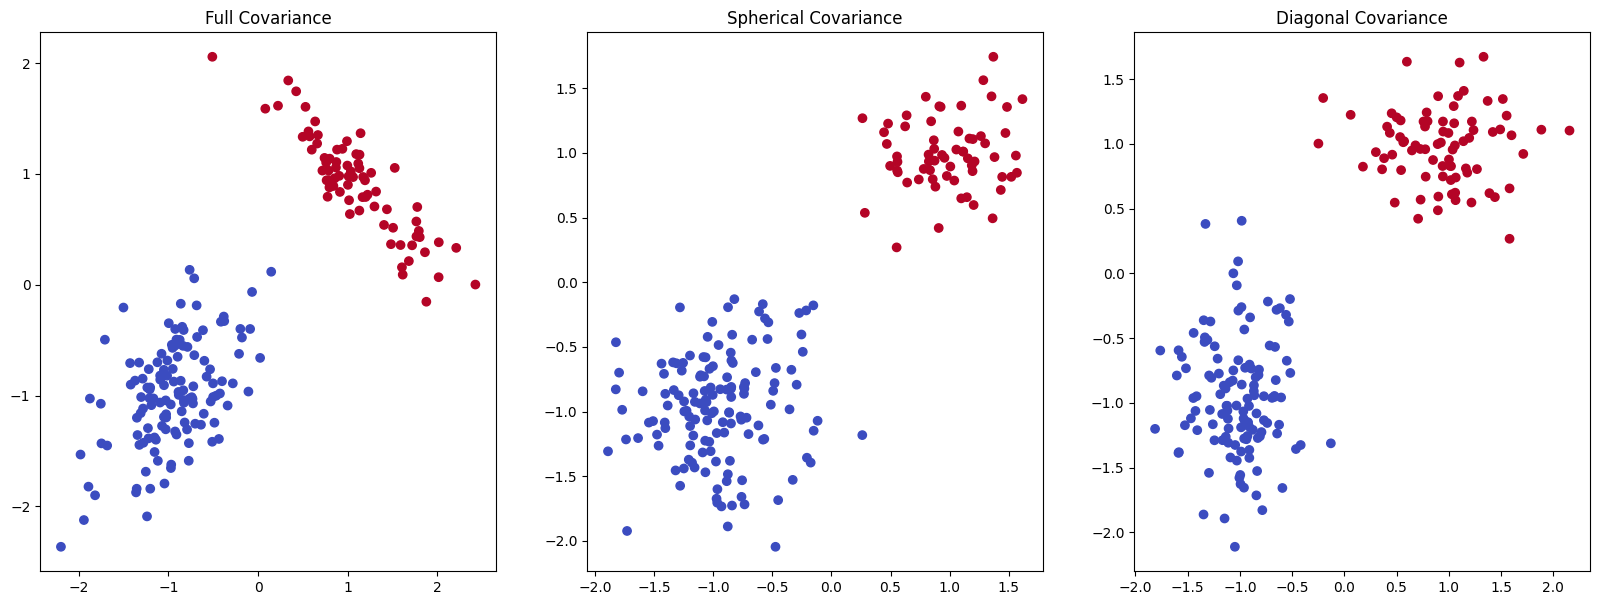

In [ ]:
#All imports
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats import norm, multivariate_normal
import sys
import math

##########################################
#Part-6)-a: Generating synthetic data
##########################################

def generateData(pi, mu, sigma, N):
    ############################################################################
    #pi = weights of Gaussians, mu = mean of Gaussians, sigma = convariance of Gaussians, N = number of data points
    #Steps
    #1.Select the Gaussian following the probability distribution as pi
    #2.Sample the data points from the selected Gaussian
    #3.Repeat the process N times to get N data points
    #4.Return the sampled data
    ############################################################################
    #You may look into "random.choices" and "np.random.multivariate_normal" functions

    labels = rand.choices(population=[0, 1], weights=pi, k=N)
    data = [np.random.multivariate_normal(mean=mu[label], cov=sigma[label]) for label in labels]

    return np.asarray(data), np.asarray(labels)
    ############################################################################


############################################################################
#Choose the appropriate means ($\mu$), covariances ($\Sigma$), and weights
############################################################################
mu1 = [-1.0, -1.0]   #Mean vector of component1 in GMM
sig1 = [[0.15, 0.1], [0.1, 0.25]]   #Full covariance matrix of component1 in GMM
mu2 = [1.0, 1.0]     #Mean vector of component2 in GMM
sig2 = [[0.3, -0.25], [-0.25, 0.25]]   #Full covariance matrix of component2 in GMM
pi = [0.6, 0.4]      #Prior probabilities

n_points = 200  #Number of points

# Spherical covariances
sig1_s = [[0.2, 0.0], [0.0, 0.2]]
sig2_s = [[0.1, 0.0], [0.0, 0.1]]

# Diagonal covariances
sig1_d = [[0.1, 0.0], [0.0, 0.2]]
sig2_d = [[0.2, 0.0], [0.0, 0.1]]

############################################################################
#Create the synthetic data set
############################################################################

data_full, labels_full = generateData(pi, [mu1, mu2], [sig1, sig2], n_points)
data_sp, labels_sp = generateData(pi, [mu1, mu2], [sig1_s, sig2_s], n_points)
data_dg, labels_dg = generateData(pi, [mu1, mu2], [sig1_d, sig2_d], n_points)

############################################################################
#Plot the synthetic data set
############################################################################

fig, ax = plt.subplots(1,3, figsize=(20,7))

#Visualize the data sampled from the GMM with full covariance matrix
ax[0].scatter(data_full[:, 0], data_full[:, 1], c=labels_full, cmap='coolwarm')
ax[0].set_title('Full Covariance')

#Visualize the data sampled from the GMM with spherical covariance matrix
ax[1].scatter(data_sp[:, 0], data_sp[:, 1], c=labels_sp, cmap='coolwarm')
ax[1].set_title('Spherical Covariance')

#Visualize the data sampled from the GMM with diagonal covariance matrix
ax[2].scatter(data_dg[:, 0], data_dg[:, 1], c=labels_dg, cmap='coolwarm')
ax[2].set_title('Diagonal Covariance')

plt.show()




Step 1, Log-Likelihood: -716.5303


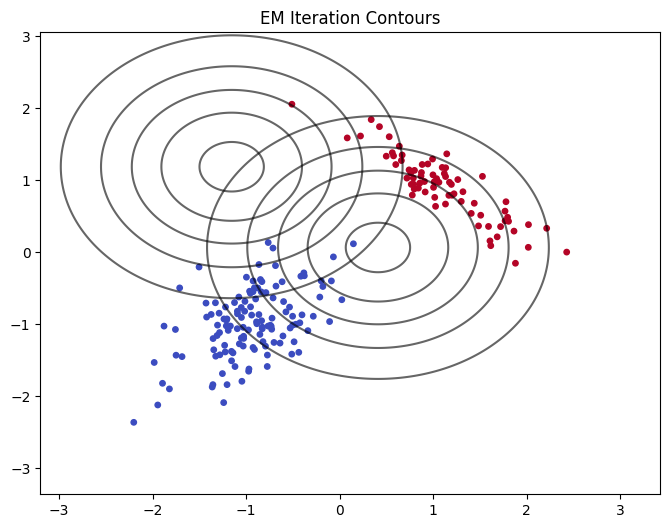

Step 2, Log-Likelihood: -482.0714


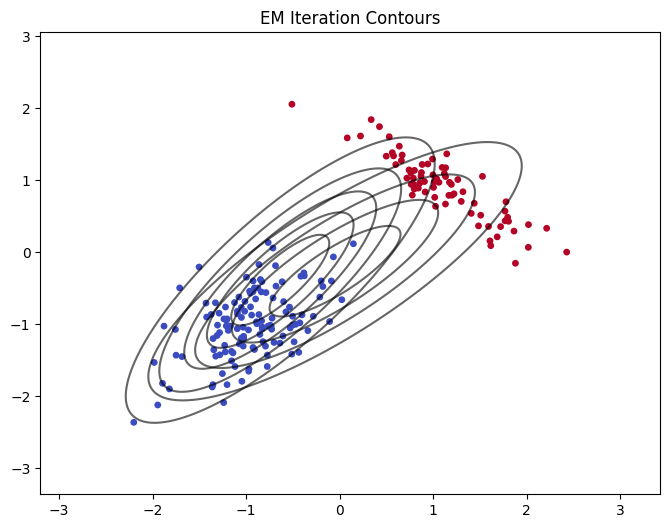

Step 3, Log-Likelihood: -478.8315


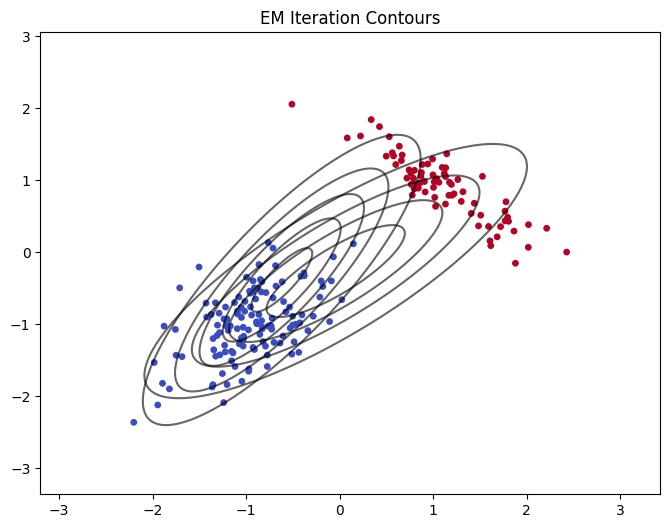

Step 4, Log-Likelihood: -477.4108


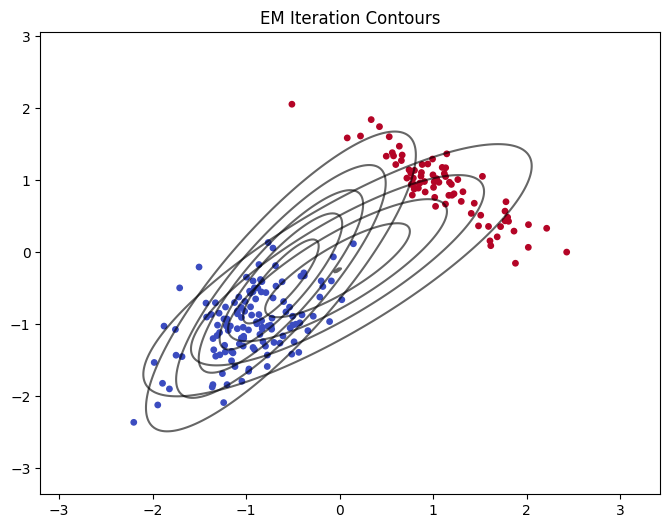

Step 5, Log-Likelihood: -476.5391


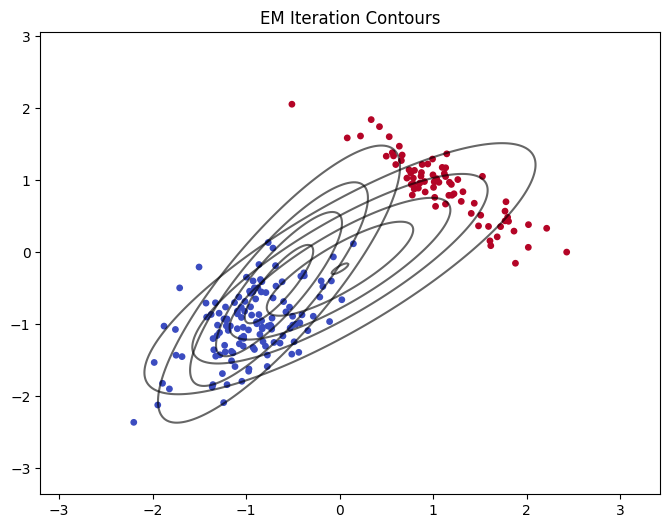

Step 6, Log-Likelihood: -475.6572


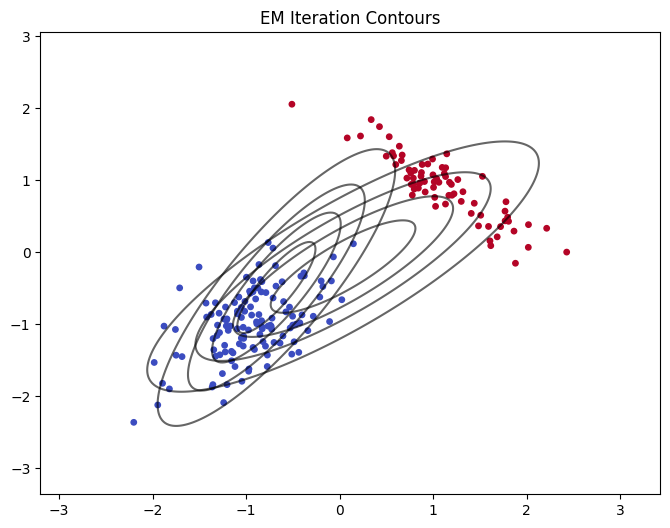

Step 7, Log-Likelihood: -474.5367


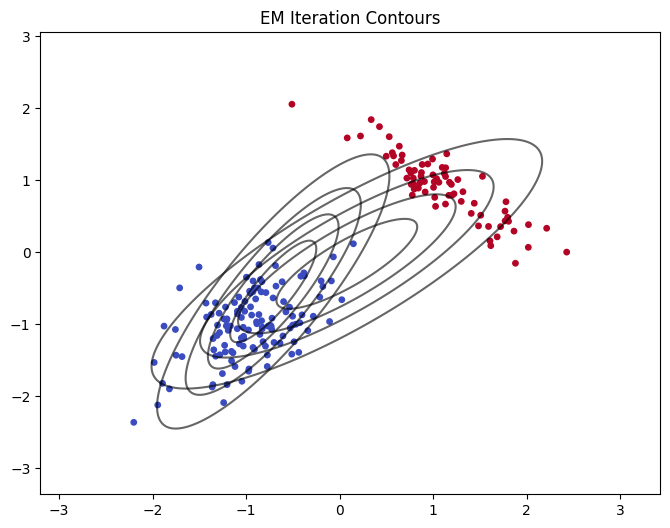

Step 8, Log-Likelihood: -472.9797


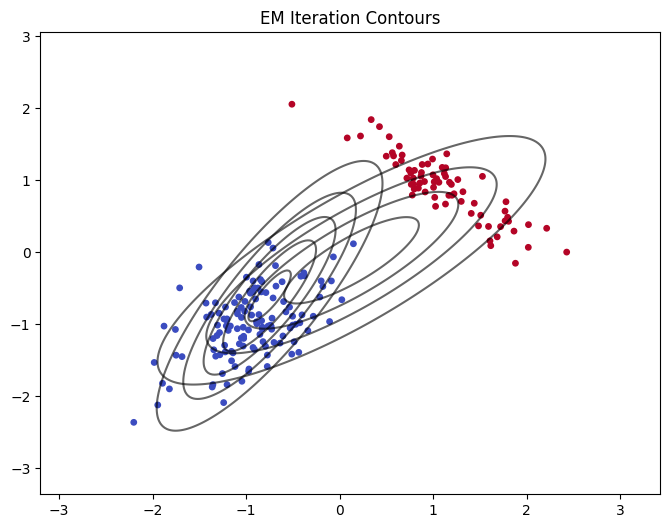

Step 9, Log-Likelihood: -470.6124


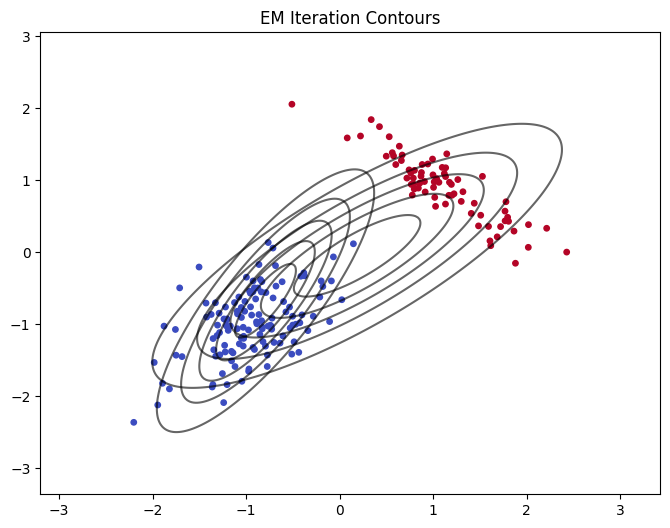

Step 10, Log-Likelihood: -466.3215


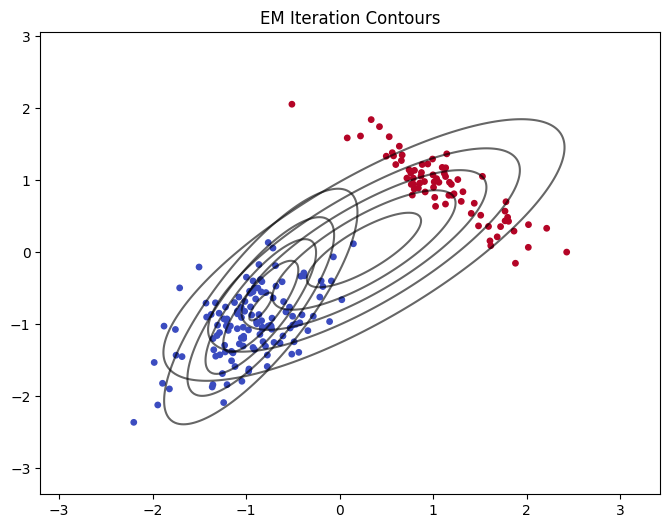

In [ ]:
#All imports
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal
import sys
import math

##########################################
#Part-6)-b: Implimentation of Expectation-Maximization (EM) algorithm
##########################################

############################################################################
#Write a function to compute the log-likelihood of the data given the parameters
############################################################################
def likelihood(data, pi, mu, sigma, log_likelihood=False, likelihoods=False):
    #Inputs: data, parameters of GMM model
    #Outputs: likelihood
    N = data.shape[0]
    M = len(pi)
    probs = np.zeros((N, M))

    for k in range(M):
        probs[:, k] = pi[k] * multivariate_normal.pdf(data, mean=mu[k], cov=sigma[k])

    total_likelihood = np.sum(probs, axis=1)

    if log_likelihood:
        return np.sum(np.log(total_likelihood + 1e-12))  # Avoid log(0)
    elif likelihoods:
        return probs
    else:
        return np.sum(total_likelihood)

############################################################################
#Write a function for the expectation step
############################################################################
def expectation(data, pi, mu, sigma):
    #Inputs: data, parameters of GMM model
    #Outputs: gamma
    N = data.shape[0]
    M = len(pi)
    gamma = np.zeros((N, M))

    for n in range(N):
        #Iterate through the data points
        for k in range(M):
            #Iterate through the components in GMM
            numerator = pi[k] * multivariate_normal.pdf(data[n], mean=mu[k], cov=sigma[k])
            denominator = sum(pi[m] * multivariate_normal.pdf(data[n], mean=mu[m], cov=sigma[m]) for m in range(M))
            gamma[n, k] = numerator / (denominator + 1e-12)  # Avoid division by zero
    return gamma

############################################################################
#Write a function for the maximization step.
############################################################################
def maximization(data, gamma):
    #Inputs: data, gamma
    #Outputs: Updated parameters of GMM model
    N, D = data.shape
    M = gamma.shape[1]

    Nk = np.sum(gamma, axis=0)

    #Update mu
    mu = [(np.sum(gamma[:, k][:, np.newaxis] * data, axis=0)) / (Nk[k] + 1e-12) for k in range(M)]

    #Update sigma
    sigma = []
    for k in range(M):
        diff = data - mu[k]
        weighted_sum = np.dot((gamma[:, k][:, np.newaxis] * diff).T, diff)
        sigma_k = weighted_sum / (Nk[k] + 1e-12)
        sigma.append(sigma_k)

    #Update pi
    pi = Nk / N

    #Return the parameters of GMM model
    return pi, mu, sigma

#Complete the below function. It plots the contours
def plot_contours(data, labels, pi, mu, sigma):
    x = np.linspace(np.min(data[:, 0]) - 1, np.max(data[:, 0]) + 1, 300)
    y = np.linspace(np.min(data[:, 1]) - 1, np.max(data[:, 1]) + 1, 300)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(data[:, 0], data[:, 1], c=labels, cmap='coolwarm', s=15)

    for k in range(len(pi)):
        rv = multivariate_normal(mean=mu[k], cov=sigma[k])
        Z = rv.pdf(pos)
        ax.contour(X, Y, Z, levels=5, colors='k', alpha=0.6)

    ax.set_title('EM Iteration Contours')
    plt.show()

############################################################################
#Run the expectation and maximzation algorithm to estimate the parameters
############################################################################
data = data_full     #data to run EM-algorithm
labels = labels_full #labels
N = data.shape[0]    #number of input examples
D = data.shape[1]    #data dimension
M = 2                #no.of components in GMM

pi = np.array([0.5, 0.5])                       #Initialize the prior probabilities
mu = [np.random.randn(D), np.random.randn(D)]  #Initialize the mean vectors
sigma = [np.eye(D), np.eye(D)]                 #Initialize the covariance matrices

nsteps = 10   #Number of steps to run EM algorithm
for index in range(0, nsteps, 1):

    #Compute the likelihood
    ll = likelihood(data, pi, mu, sigma, log_likelihood=True)
    print(f"Step {index + 1}, Log-Likelihood: {ll:.4f}")

    #Plot the contours
    plot_contours(data, labels, pi, mu, sigma)

    #Expectation step
    gamma = expectation(data, pi, mu, sigma)

    #Maximization step
    pi, mu, sigma = maximization(data, gamma)







EM with closely initialized means:
Step 1, Log-Likelihood: -609.1748


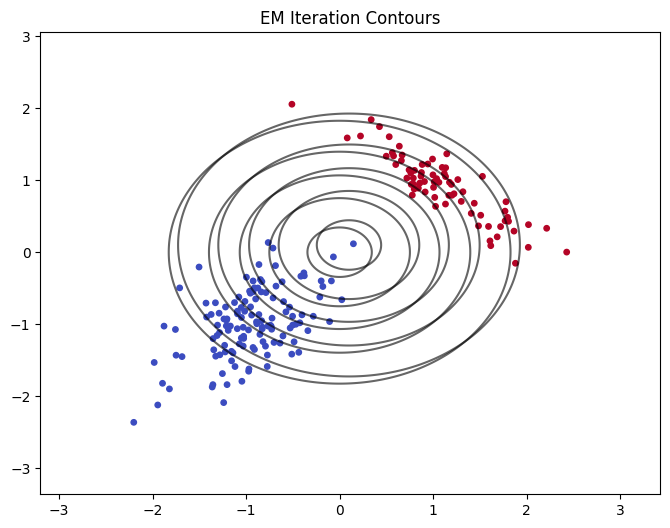

Step 2, Log-Likelihood: -487.5108


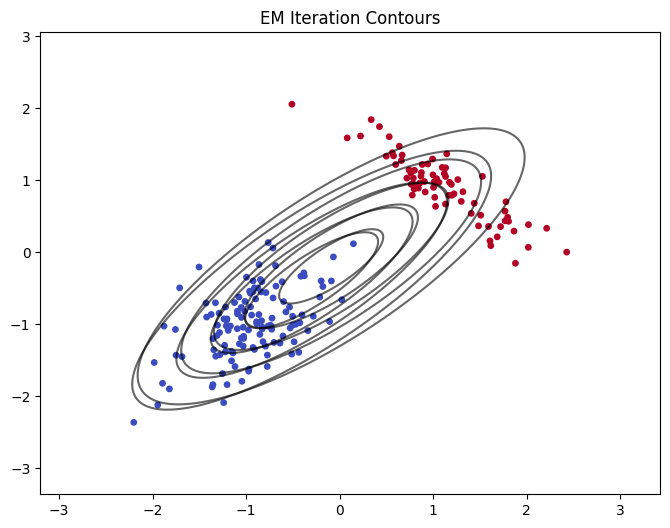

Step 3, Log-Likelihood: -485.0684


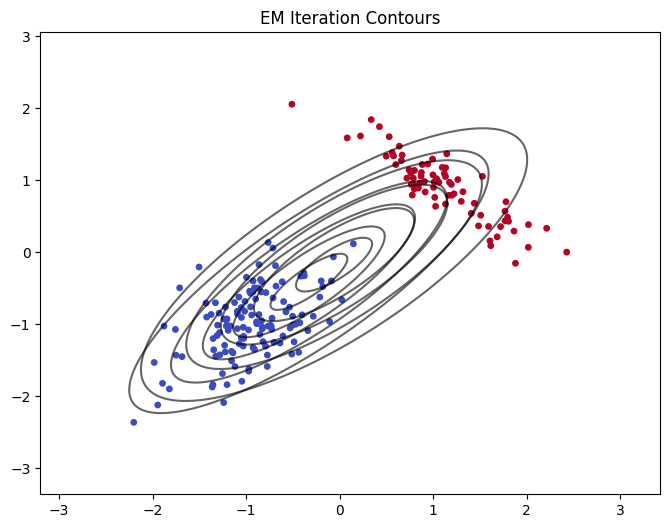

Step 4, Log-Likelihood: -479.1837


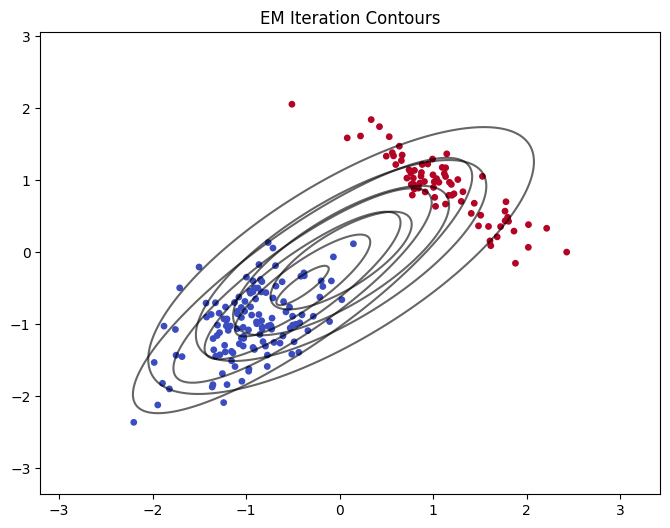

Step 5, Log-Likelihood: -470.8290


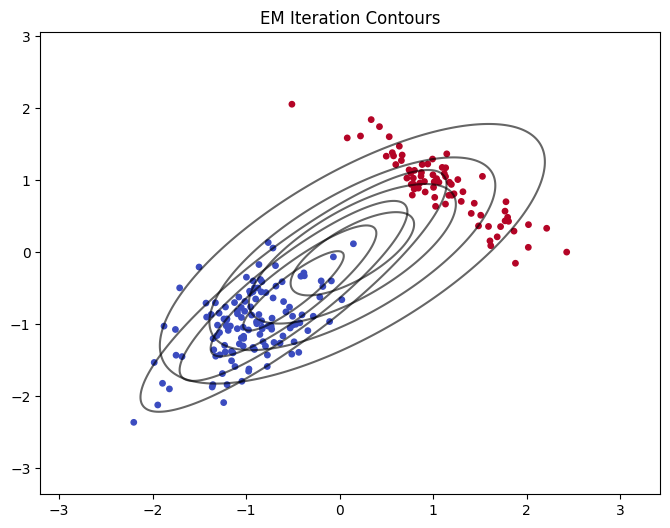

Step 6, Log-Likelihood: -464.1988


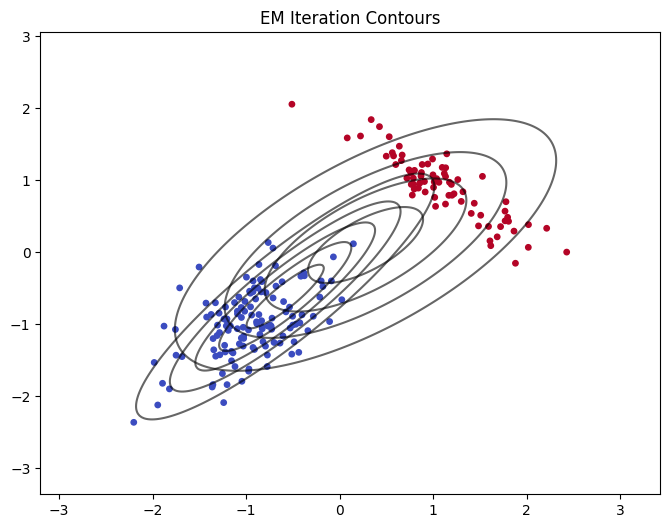

Step 7, Log-Likelihood: -459.6290


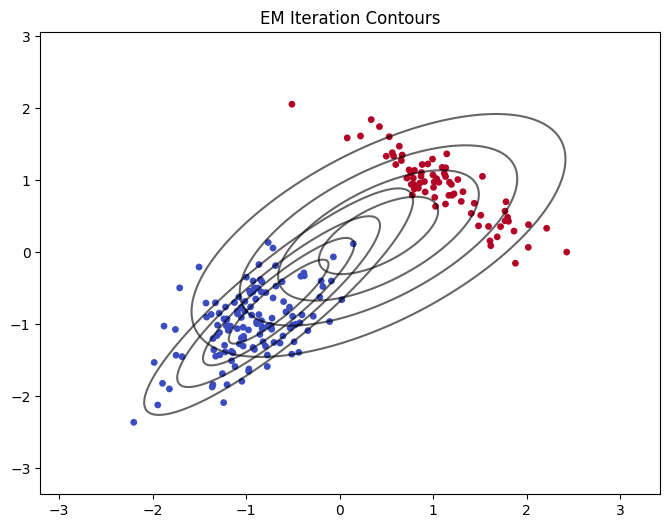

Step 8, Log-Likelihood: -453.9602


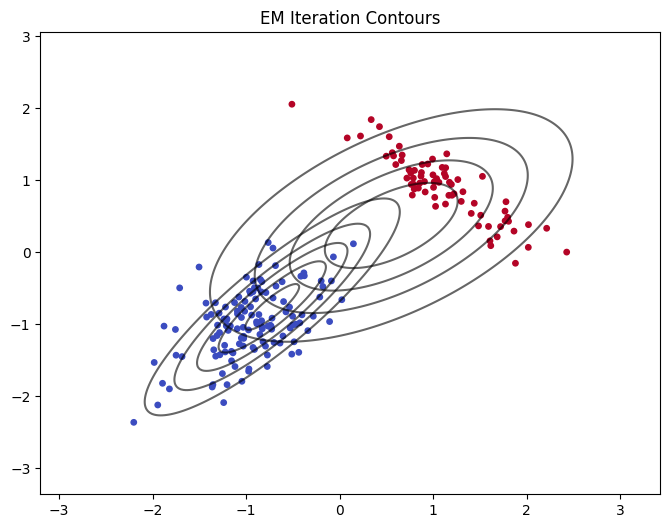

Step 9, Log-Likelihood: -442.1781


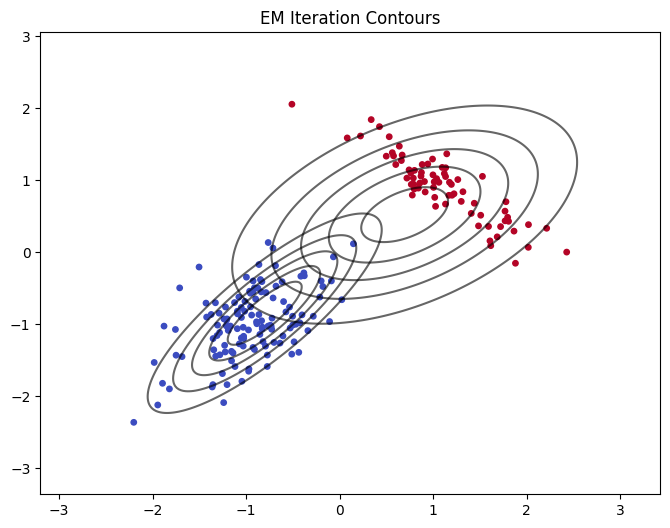

Step 10, Log-Likelihood: -413.2520


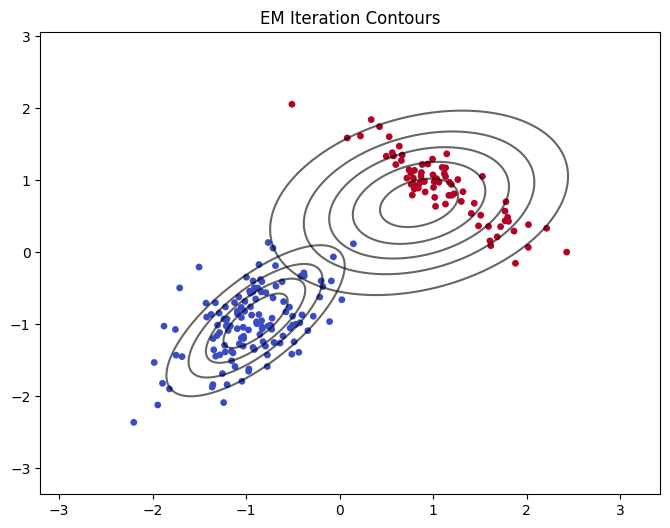


EM with poor priors (one component dominates):
Step 1, Log-Likelihood: -5361.9854


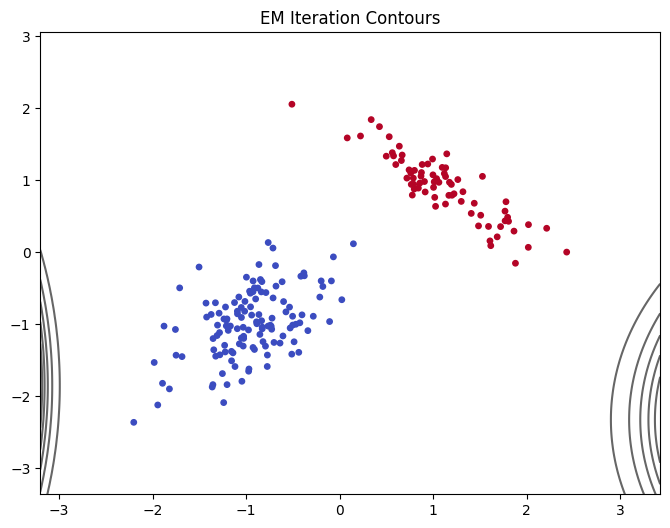

Step 2, Log-Likelihood: -3467.1999


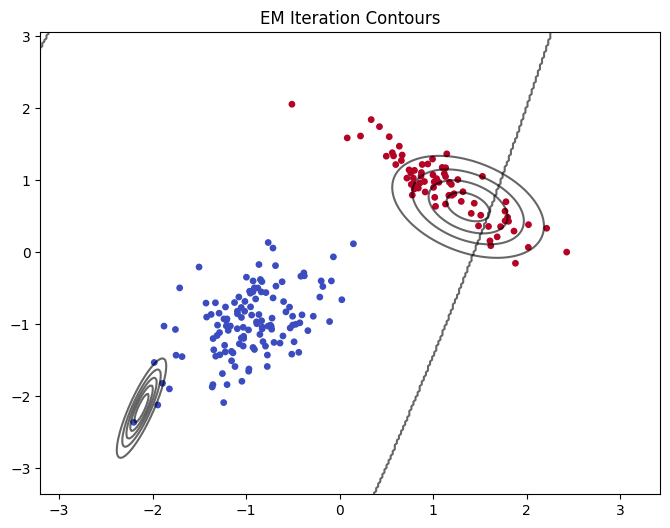

Step 3, Log-Likelihood: -710.5502


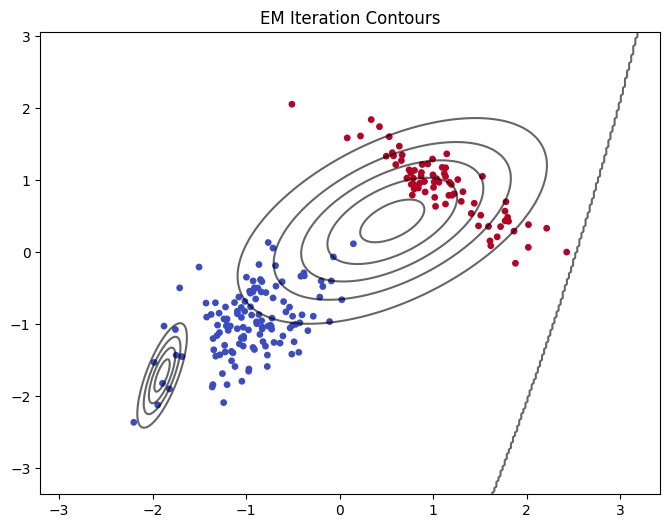

Step 4, Log-Likelihood: -490.7477


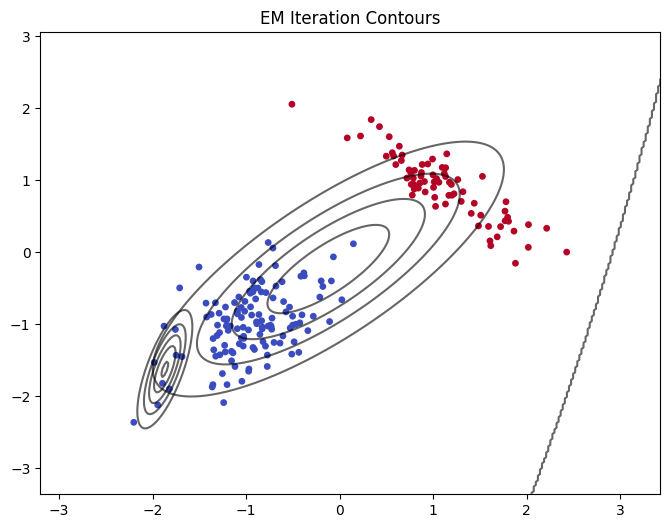

Step 5, Log-Likelihood: -489.0195


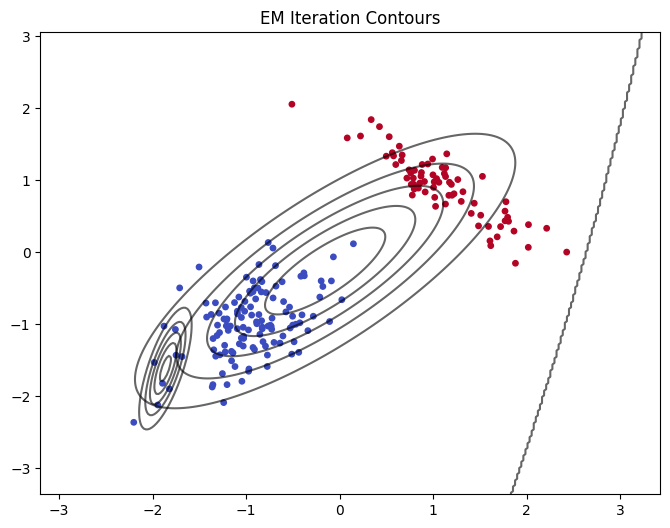

Step 6, Log-Likelihood: -488.5101


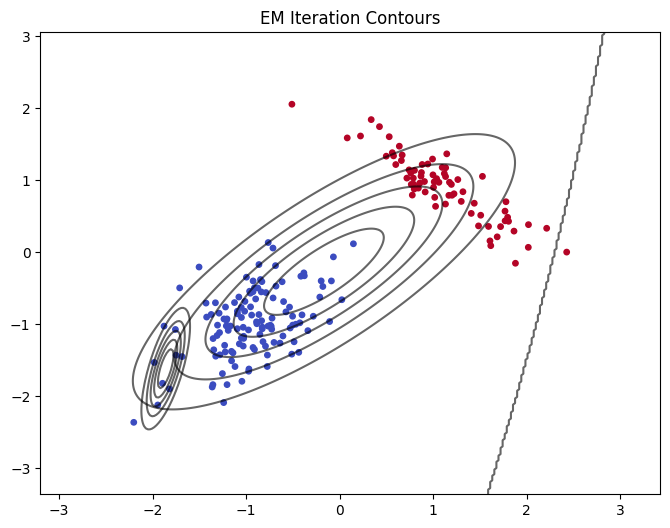

Step 7, Log-Likelihood: -488.2490


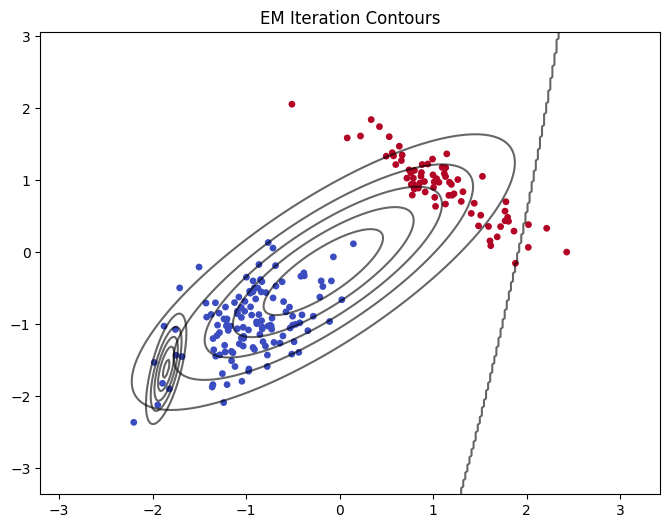

Step 8, Log-Likelihood: -488.0841


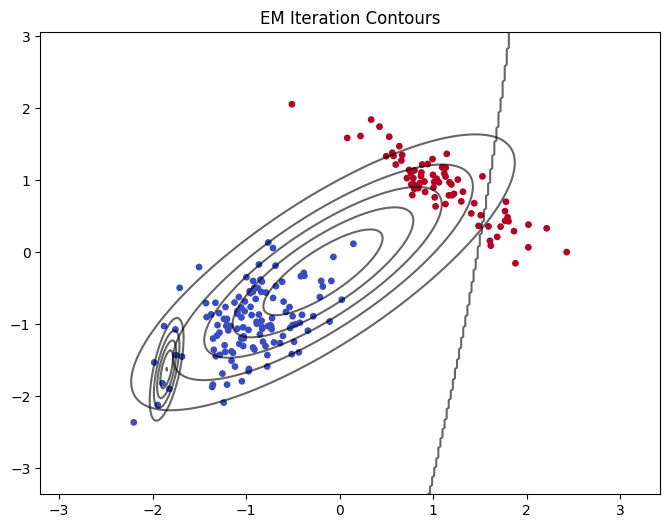

Step 9, Log-Likelihood: -487.9954


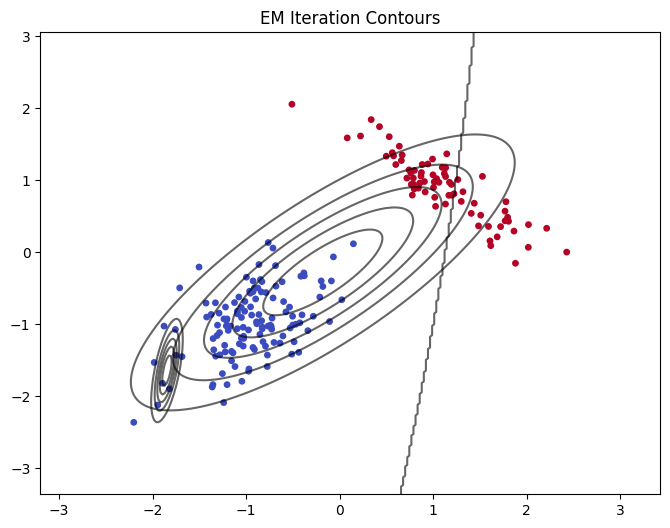

Step 10, Log-Likelihood: -487.9133


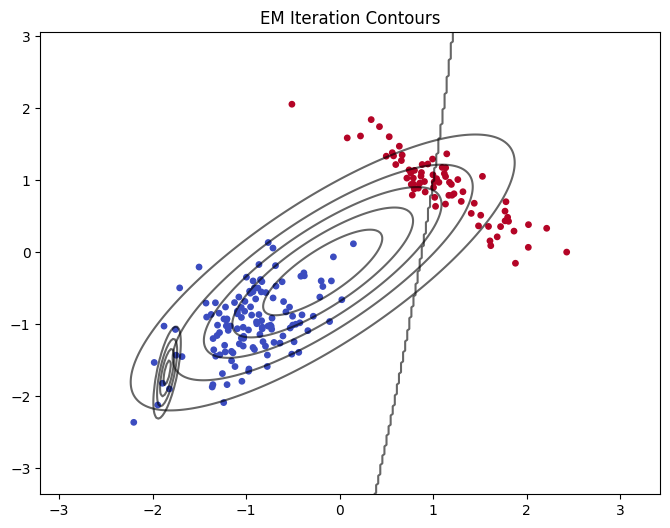


Multiple random initializations to observe local maxima behavior:
Trial 1, Final Log-Likelihood: -313.8888
Trial 2, Final Log-Likelihood: -313.8888
Trial 3, Final Log-Likelihood: -360.9222
Trial 4, Final Log-Likelihood: -313.8888
Trial 5, Final Log-Likelihood: -313.8888

Best Log-Likelihood after multiple runs: -313.8888


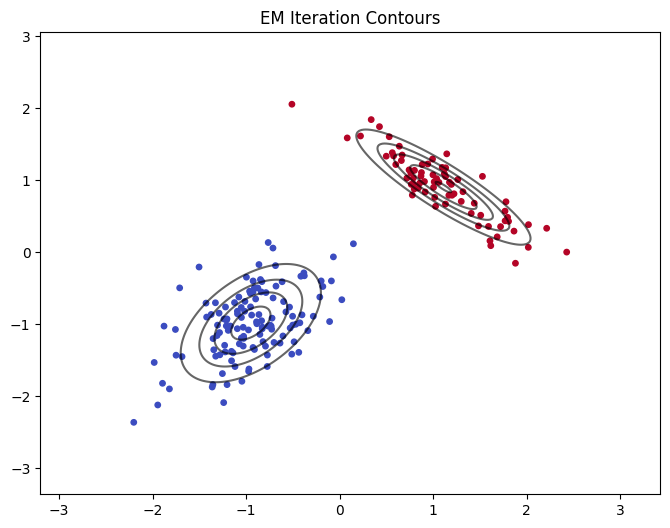


Degeneracy test: collapsing cluster
Step 1, Log-Likelihood: -5046.4744


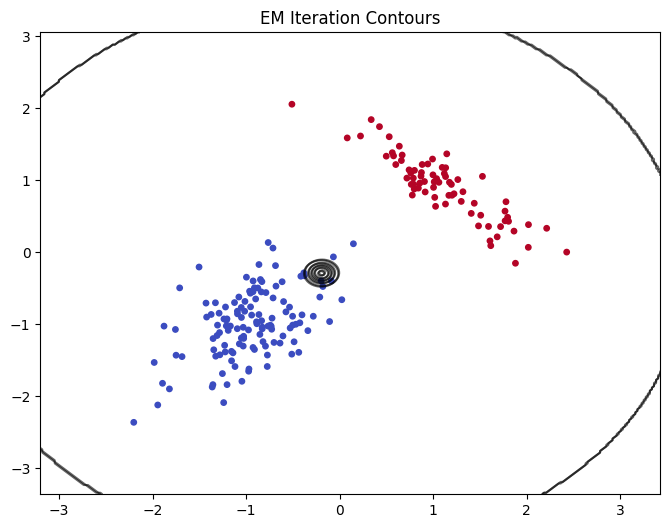

Step 2, Log-Likelihood: -2512.3449


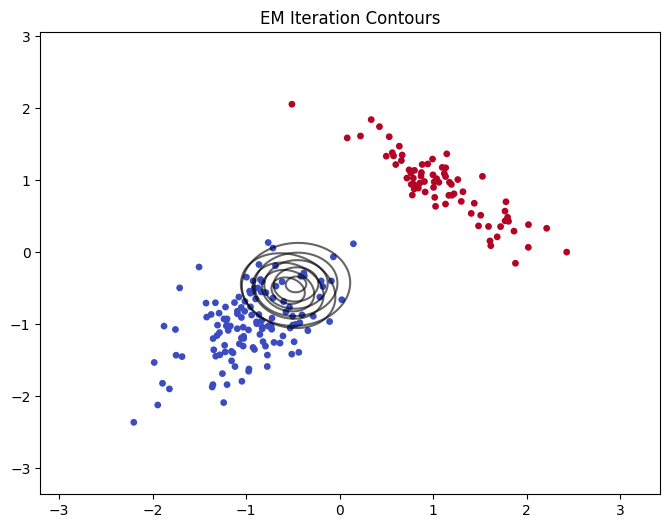

Step 3, Log-Likelihood: -492.4518


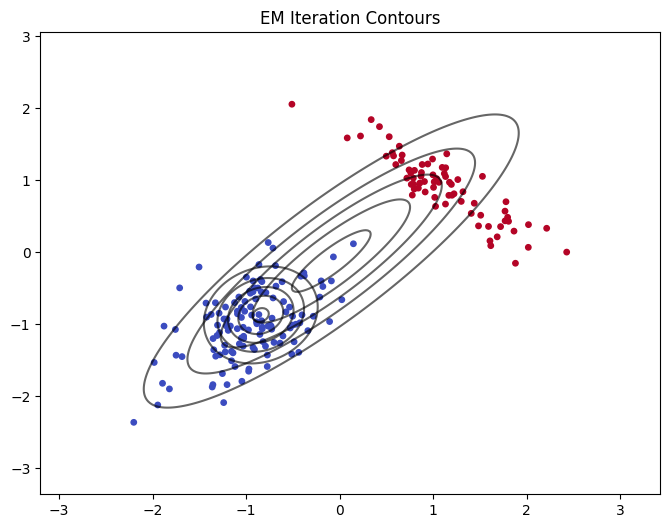

Step 4, Log-Likelihood: -434.6278


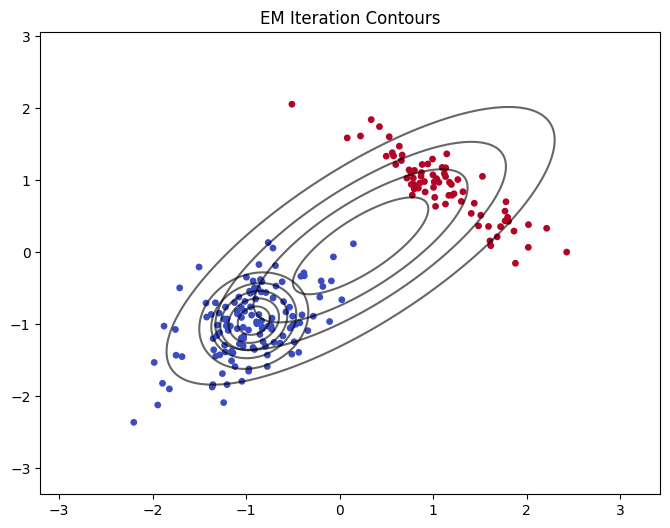

Step 5, Log-Likelihood: -429.8699


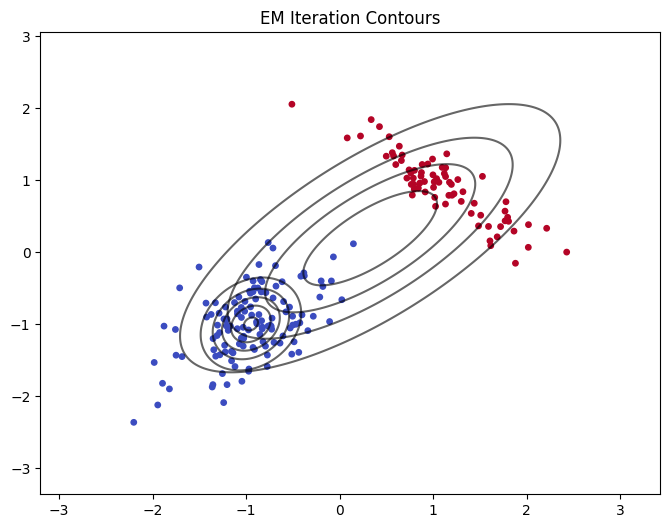

In [ ]:
############################################################################
##Part-6)-d: Understand the issues with EM algorithm
############################################################################

############################################################################
#Step-1: Initialize parameters very close to each other and observe
############################################################################
#Initialization (close means)
mu_init = [np.array([0.0, 0.0]), np.array([0.1, 0.1])]
pi_init = np.array([0.5, 0.5])
sigma_init = [np.eye(2), np.eye(2)]

mu = mu_init.copy()
pi = pi_init.copy()
sigma = sigma_init.copy()

nsteps = 10
print("EM with closely initialized means:")
for step in range(nsteps):
    ll = likelihood(data, pi, mu, sigma, log_likelihood=True)
    print(f"Step {step + 1}, Log-Likelihood: {ll:.4f}")
    plot_contours(data, labels, pi, mu, sigma)
    gamma = expectation(data, pi, mu, sigma)
    pi, mu, sigma = maximization(data, gamma)


############################################################################
#Step-2: Initialize with poor priors and check convergence
############################################################################
#Initialization (bad priors)
mu_init = [np.random.randn(2) * 5, np.random.randn(2) * 5]
pi_init = np.array([0.99, 0.01])  # one dominates the other
sigma_init = [np.eye(2), np.eye(2)]

mu = mu_init.copy()
pi = pi_init.copy()
sigma = sigma_init.copy()

nsteps = 10
print("\nEM with poor priors (one component dominates):")
for step in range(nsteps):
    ll = likelihood(data, pi, mu, sigma, log_likelihood=True)
    print(f"Step {step + 1}, Log-Likelihood: {ll:.4f}")
    plot_contours(data, labels, pi, mu, sigma)
    gamma = expectation(data, pi, mu, sigma)
    pi, mu, sigma = maximization(data, gamma)


############################################################################
#Step-3: Show that EM can converge to local maxima (run multiple initializations)
############################################################################
print("\nMultiple random initializations to observe local maxima behavior:")
best_ll = -np.inf
best_params = None

for trial in range(5):
    mu = [np.random.randn(2), np.random.randn(2)]
    pi = np.array([0.5, 0.5])
    sigma = [np.eye(2), np.eye(2)]

    for step in range(10):
        gamma = expectation(data, pi, mu, sigma)
        pi, mu, sigma = maximization(data, gamma)

    ll = likelihood(data, pi, mu, sigma, log_likelihood=True)
    print(f"Trial {trial + 1}, Final Log-Likelihood: {ll:.4f}")
    if ll > best_ll:
        best_ll = ll
        best_params = (pi.copy(), mu.copy(), [s.copy() for s in sigma])

# Plot the best result
print(f"\nBest Log-Likelihood after multiple runs: {best_ll:.4f}")
plot_contours(data, labels, *best_params)


############################################################################
#Step-4: Degeneracy - one cluster collapses to a point
############################################################################
print("\nDegeneracy test: collapsing cluster")

# Force one cluster to be initialized very close to a single point
mu = [np.mean(data, axis=0), np.mean(data, axis=0) + 0.01]
pi = np.array([0.5, 0.5])
sigma = [np.eye(2)*1e-2, np.eye(2)*1e-2]

nsteps = 5
for step in range(nsteps):
    ll = likelihood(data, pi, mu, sigma, log_likelihood=True)
    print(f"Step {step + 1}, Log-Likelihood: {ll:.4f}")
    plot_contours(data, labels, pi, mu, sigma)
    gamma = expectation(data, pi, mu, sigma)
    pi, mu, sigma = maximization(data, gamma)






<b> Report your observations </b>

1.Sensitivity to Initialization:
The EM algorithm is highly sensitive to the initial values of the parameters (means, covariances, and mixing weights). Different initializations can lead the algorithm to converge to different solutions. Poor initial guesses may cause EM to assign incorrect responsibilities, resulting in inaccurate parameter estimates and clustering outcomes. Hence, initializing with well-separated means or using methods like K-Means for initialization can significantly improve performance.

2.Convergence to Local Optima:
EM guarantees convergence, but only to a local optimum of the likelihood function. This means the solution it reaches might not be the global best. Running EM multiple times with different initializations and selecting the solution with the highest log-likelihood can help avoid suboptimal outcomes. Visualization of intermediate contours shows how different initializations can lead to very different final GMM fits.

3.Degeneracy and Ill-Conditioned Covariances:
If EM assigns very few data points to a Gaussian component, the estimated covariance matrix can become singular or nearly zero, leading to numerical instability and overfitting. This is known as degeneracy. One common fix is to regularize the covariance matrices by adding a small positive value to the diagonal elements, ensuring they remain well-conditioned and invertible throughout the iterations.

